### This notebook uses the more updated data

note: some of the cells have been collapsed (the ones using time as a feature). To expand them back out just click the error on the left of the cell or the blue arrows in the cell

In [1]:
#Necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Data Exploration

In [2]:
#Reading in csv files
df_time = pd.read_csv('time_level_updated.csv') #one row for each time recorded
df_sim = pd.read_csv('sim_level.csv') #one row for each simulation run, values averaged over all times

In [3]:
#previewing both data frames
df_time.head()

,simulationID,Time_(s),Panel_height_(m),Row_spacing_(m),Array_width_(m),Array_length_(m),Tilt_angle_(deg),Mounting_type,Orientation,Total_site_length_(m),Total_site_width_(m),Evapotranspiration_(mm/day),Albedo,Wind_(%_original_value),Radiation_(%_original_value),Temperature_(%_original_value),Temperature_(C),Wind_@_2.5m_(m/s),Radiation_(W/m2),Module_surface_temp
0,1,16200,0.5,4,73,1.8,25,Fixed tilt,South,188,73,0.8,100,100,100,100,13.16157,0.000010,0.000000,286.524925
1,1,18000,0.5,4,73,1.8,25,Fixed tilt,South,188,73,0.8,100,100,100,100,12.92596,0.000010,1.436712,286.336013
2,1,19800,0.5,4,73,1.8,25,Fixed tilt,South,188,73,0.8,100,100,100,100,13.21441,0.000010,16.879000,286.289191
3,1,21600,0.5,4,73,1.8,25,Fixed tilt,South,188,73,0.8,100,100,100,100,14.88530,0.114622,55.268990,287.164732
4,1,23400,0.5,4,73,1.8,25,Fixed tilt,South,188,73,0.8,100,100,100,100,16.18238,0.282775,104.182300,288.270785


In [4]:
df_sim.head()

,simulationID,Time_(s),Panel_height_(m),Row_spacing_(m),Array_width_(m),Array_length_(m),Tilt_angle_(deg),Mounting_type,Orientation,Total_site_length_(m),Total_site_width_(m),Evapotranspiration_(mm/day),Albedo,Wind_(%_original_value),Radiation_(%_original_value),Temperature_(%_original_value),Temperature_(C),Wind_@_2.5m_(m/s),Radiation_(W/m2),Average_module_surface_temp
0,1,NaN,0.5,4,73,1.8,25,Fixed tilt,South,188,73,0.8,100,100,100,100,24.096304,2.717708,314.354881,304.175590
1,2,NaN,0.5,4,73,1.8,25,Fixed tilt,South,188,73,0.8,50,100,100,100,24.096304,2.717708,314.354881,307.726692
2,3,NaN,0.5,4,73,1.8,25,Fixed tilt,South,188,73,0.8,0,100,100,100,24.096304,2.717708,314.354881,306.072912
3,4,NaN,0.5,4,73,1.8,25,Fixed tilt,South,188,73,0.0,100,100,100,100,24.096304,2.717708,314.354881,304.638638
4,5,NaN,0.5,4,73,1.8,25,Fixed tilt,South,188,73,0.0,50,100,100,100,24.096304,2.717708,314.354881,305.914223


In [5]:
#The time column for the simulation level data can be dropped (all NaNs, just resulted from excel formatting)
df_sim = df_sim.drop(['Time_(s)'], axis = 1)

In [6]:
#Converting columns to categorical
#This includes Mounting type, and Orientation 
df_time['Mounting_type'] = pd.Categorical(df_time['Mounting_type'])
df_time['Orientation'] = pd.Categorical(df_time['Orientation'])
df_sim['Mounting_type'] = pd.Categorical(df_sim['Mounting_type'])
df_sim['Orientation'] = pd.Categorical(df_sim['Orientation'])
df_sim['Average_module_surface_temp'] = (df_sim['Average_module_surface_temp']).astype('float')
#print(df_time.dtypes)
#print(df_sim.dtypes)


Some columns only take on one value. I will not drop these from the data set during the data cleaning process because these may be changed in future simulations when more data is added to the csv. I want to minimize the changes that will need to be made to this notebook in that case.

In [7]:
#First describing the data
df_time.describe()

,simulationID,Time_(s),Panel_height_(m),Row_spacing_(m),Array_width_(m),Array_length_(m),Tilt_angle_(deg),Total_site_length_(m),Total_site_width_(m),Evapotranspiration_(mm/day),Albedo,Wind_(%_original_value),Radiation_(%_original_value),Temperature_(%_original_value),Temperature_(C),Wind_@_2.5m_(m/s),Radiation_(W/m2),Module_surface_temp
count,9126.000000,9126.000000,9126.000000,9126.000000,9126.0,9.126000e+03,9126.0,9126.0,9126.0,9126.000000,9126.000000,9126.000000,9126.000000,9126.0,9126.000000,9126.000000,9126.000000,9126.000000
mean,117.500000,50400.000000,2.807692,4.307692,73.0,1.800000e+00,25.0,188.0,73.0,0.400000,49.786325,85.000000,96.153846,100.0,62.731797,2.734311,233.961651,244.059727
std,67.553066,20259.441635,1.697056,1.065936,0.0,3.006649e-13,0.0,0.0,0.0,0.400022,40.695439,22.956063,13.324198,0.0,94.133905,1.744552,253.407735,119.287192
min,1.000000,16200.000000,0.500000,4.000000,73.0,1.800000e+00,25.0,188.0,73.0,0.000000,0.000000,25.000000,50.000000,100.0,9.209025,0.000003,0.000000,0.000000
25%,59.000000,32400.000000,1.500000,4.000000,73.0,1.800000e+00,25.0,188.0,73.0,0.000000,0.000000,75.000000,100.000000,100.0,17.814630,1.514903,0.156017,283.071150
50%,117.500000,50400.000000,2.500000,4.000000,73.0,1.800000e+00,25.0,188.0,73.0,0.400000,50.000000,100.000000,100.000000,100.0,25.488160,2.651500,129.960400,295.900745
75%,176.000000,68400.000000,4.500000,4.000000,73.0,1.800000e+00,25.0,188.0,73.0,0.800000,100.000000,100.000000,100.000000,100.0,29.143750,3.708348,458.871500,307.986401
max,234.000000,84600.000000,5.500000,8.000000,73.0,1.800000e+00,25.0,188.0,73.0,0.800000,100.000000,100.000000,100.000000,100.0,283.485340,7.814701,713.501500,338.768755


In [8]:
df_sim.describe()

,simulationID,Panel_height_(m),Row_spacing_(m),Array_width_(m),Array_length_(m),Tilt_angle_(deg),Total_site_length_(m),Total_site_width_(m),Evapotranspiration_(mm/day),Albedo,Wind_(%_original_value),Radiation_(%_original_value),Temperature_(%_original_value),Temperature_(C),Wind_@_2.5m_(m/s),Radiation_(W/m2),Average_module_surface_temp
count,144.000000,144.000000,144.0,144.0,1.440000e+02,144.0,144.0,144.0,144.000000,144.000000,144.000000,144.000000,144.0,144.000000,144.000000,144.000000,144.000000
mean,72.500000,2.750000,4.0,73.0,1.800000e+00,25.0,188.0,73.0,0.400000,49.652778,75.625000,93.750000,100.0,24.096304,2.055267,294.707701,303.258636
std,41.713307,1.695325,0.0,0.0,4.679212e-15,0.0,0.0,0.0,0.401396,40.751905,25.142079,16.593663,0.0,0.000000,0.683288,52.162989,25.528656
min,1.000000,0.500000,4.0,73.0,1.800000e+00,25.0,188.0,73.0,0.000000,0.000000,25.000000,50.000000,100.0,24.096304,0.679427,157.177441,0.000000
25%,36.750000,1.250000,4.0,73.0,1.800000e+00,25.0,188.0,73.0,0.000000,0.000000,68.750000,100.000000,100.0,24.096304,1.868424,314.354881,304.522149
50%,72.500000,2.500000,4.0,73.0,1.800000e+00,25.0,188.0,73.0,0.400000,50.000000,77.500000,100.000000,100.0,24.096304,2.106224,314.354881,305.606975
75%,108.250000,4.500000,4.0,73.0,1.800000e+00,25.0,188.0,73.0,0.800000,100.000000,100.000000,100.000000,100.0,24.096304,2.717708,314.354881,306.516497
max,144.000000,5.500000,4.0,73.0,1.800000e+00,25.0,188.0,73.0,0.800000,100.000000,100.000000,100.000000,100.0,24.096304,2.717708,314.354881,310.588388


Now let's plot the correlation values of the features with our output variable, Module_surface_temp or Average_module_surface_temp. I will first print out the correlation matrix, then plot a heatmap (provides a nice visual to compare the magnitudes of correlation values of different features). The correlation value can only be computed for numerical variables. To assess the relationship between categorical variables we can create other visualizations such as box plots. Additionally, the correlation will be NaN for feautres that are all one value (i.e. Array Width) because they will have a standard deviation of 0 (see formula for correlation below)

Pearson correlation coefficient formula:
$$\rho_{X,Y} = \frac{cov(X,Y)}{\sigma_X \sigma_Y} = \frac{E[(X-\mu_X)(Y-\mu_Y)]}{\sigma_X \sigma_Y}$$
The values range between -1 and 1, with values larger in absolute value indicating a stronger relationship.

In [9]:
df_time_numerical = df_time[['Time_(s)', 'Panel_height_(m)', 'Evapotranspiration_(mm/day)', 'Albedo', 'Temperature_(C)', 'Wind_@_2.5m_(m/s)', 'Radiation_(W/m2)', 'Module_surface_temp']]
corr_time = df_time_numerical.corr()
corr_time

,Time_(s),Panel_height_(m),Evapotranspiration_(mm/day),Albedo,Temperature_(C),Wind_@_2.5m_(m/s),Radiation_(W/m2),Module_surface_temp
Time_(s),1.000000e+00,4.442148e-16,-4.732505e-17,1.080089e-17,0.012666,0.221430,-0.188546,-0.049438
Panel_height_(m),4.442148e-16,1.000000e+00,-9.025745e-17,-5.236476e-03,0.064375,0.062197,-0.025909,-0.132269
Evapotranspiration_(mm/day),-4.732505e-17,-9.025745e-17,1.000000e+00,5.250881e-03,-0.012123,-0.006733,0.002724,-0.003003
Albedo,1.080089e-17,-5.236476e-03,5.250881e-03,1.000000e+00,-0.012741,-0.008223,0.004939,0.017287
Temperature_(C),1.266574e-02,6.437474e-02,-1.212326e-02,-1.274069e-02,1.000000,0.683526,-0.341985,-0.466533
Wind_@_2.5m_(m/s),2.214300e-01,6.219670e-02,-6.732686e-03,-8.222518e-03,0.683526,1.000000,-0.051248,-0.333324
Radiation_(W/m2),-1.885457e-01,-2.590887e-02,2.724403e-03,4.938630e-03,-0.341985,-0.051248,1.000000,0.252802
Module_surface_temp,-4.943806e-02,-1.322688e-01,-3.003158e-03,1.728670e-02,-0.466533,-0.333324,0.252802,1.000000


<AxesSubplot:>

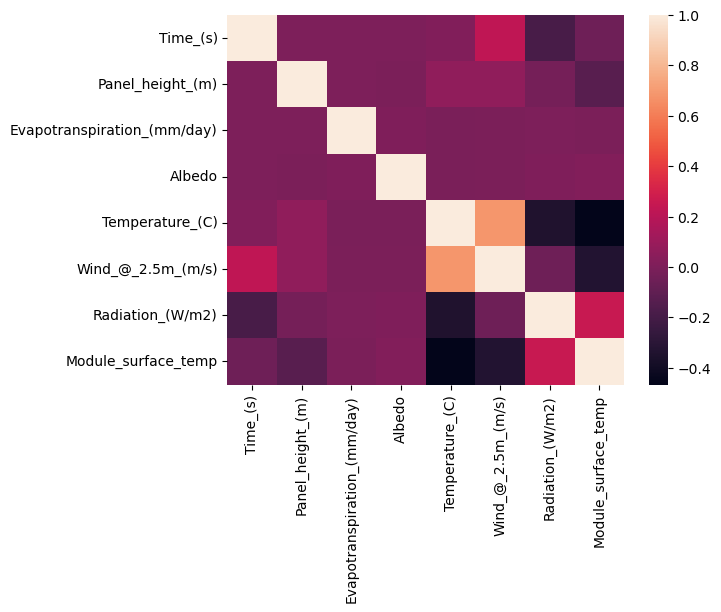

In [10]:
sns.heatmap(corr_time)

In [11]:
df_sim_numerical = df_sim[['Panel_height_(m)', 'Evapotranspiration_(mm/day)', 'Albedo', 'Wind_@_2.5m_(m/s)', 'Radiation_(W/m2)', 'Average_module_surface_temp']]
corr_sim = df_sim_numerical.corr()
corr_sim

,Panel_height_(m),Evapotranspiration_(mm/day),Albedo,Wind_@_2.5m_(m/s),Radiation_(W/m2),Average_module_surface_temp
Panel_height_(m),1.000000e+00,4.563605e-17,-0.008857,7.013681e-02,5.593084e-02,-0.146199
Evapotranspiration_(mm/day),4.563605e-17,1.000000e+00,0.008550,2.538802e-17,-5.725136e-17,-0.099939
Albedo,-8.856685e-03,8.550132e-03,1.000000,-8.318203e-03,2.262152e-02,0.072871
Wind_@_2.5m_(m/s),7.013681e-02,2.538802e-17,-0.008318,1.000000e+00,-3.677119e-01,-0.048095
Radiation_(W/m2),5.593084e-02,-5.725136e-17,0.022622,-3.677119e-01,1.000000e+00,0.028456
Average_module_surface_temp,-1.461987e-01,-9.993920e-02,0.072871,-4.809487e-02,2.845610e-02,1.000000


<AxesSubplot:>

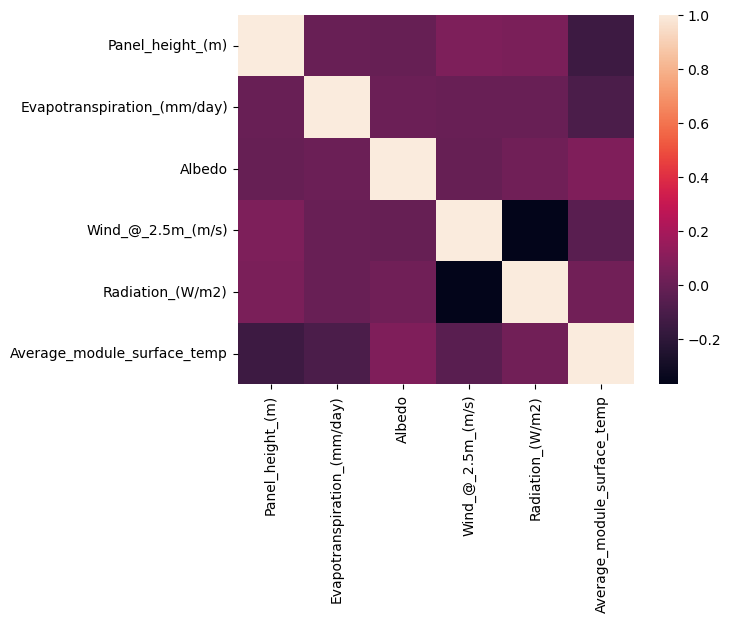

In [12]:
sns.heatmap(corr_sim)

Based on the correlation matrices at an initial glance the variables that seem most correlated with Module Surface Temperature in the time based data are `Radiation_(W/m2`), `Temperature_(C)`, and `Wind_@_2.5(m/s)`. In the simulation level data `Panel_height_(m)` and `Evapotranspiration(mm/day)` appear to be most correlated. Now we can plot some of these variables to visualize the relationships. 

Text(0, 0.5, 'Radiation (W/m2)')

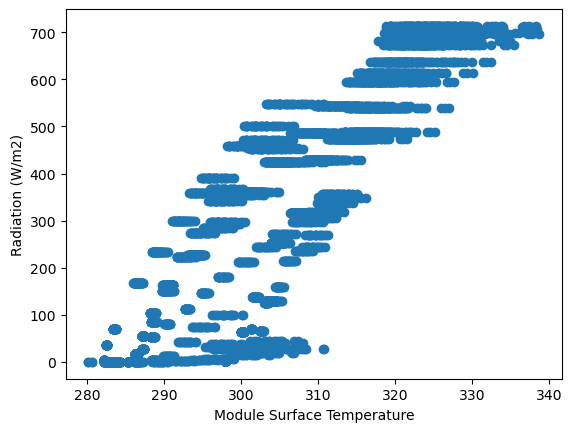

In [13]:
#for the purposes of plotting, I'll make a copy of the dataset to avoid accidentily making any changes to the 
#original data 
df_time_plot = df_time.copy()
#Filtering out the rows with 0s for either of these values so we can see the relationship
df_time_plot = df_time_plot[(df_time_plot['Radiation_(W/m2)']!=0)]
df_time_plot = df_time_plot[(df_time_plot['Module_surface_temp']!=0)]
plt.scatter(df_time_plot['Module_surface_temp'], df_time_plot['Radiation_(W/m2)'])
plt.xlabel('Module Surface Temperature')
plt.ylabel('Radiation (W/m2)')

Can see a clear positive linear trend here

Text(0, 0.5, 'Temperature(C)')

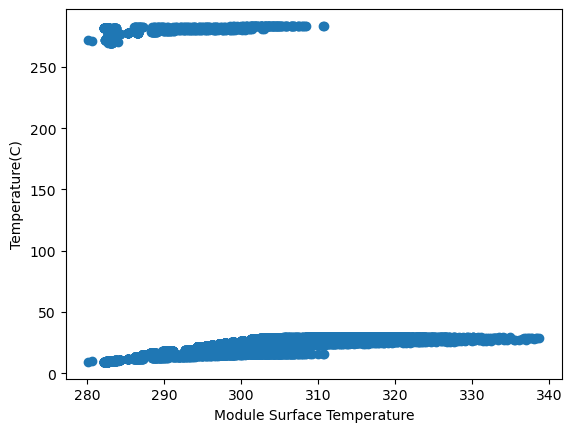

In [14]:
df_time_plot = df_time.copy()
df_time_plot = df_time_plot[(df_time_plot['Temperature_(C)']!=0)]
df_time_plot = df_time_plot[(df_time_plot['Module_surface_temp']!=0)]
plt.scatter(df_time_plot['Module_surface_temp'], df_time_plot['Temperature_(C)'])
plt.xlabel('Module Surface Temperature')
plt.ylabel('Temperature(C)')

Text(0, 0.5, 'Wind @ 2.5m (m/s)')

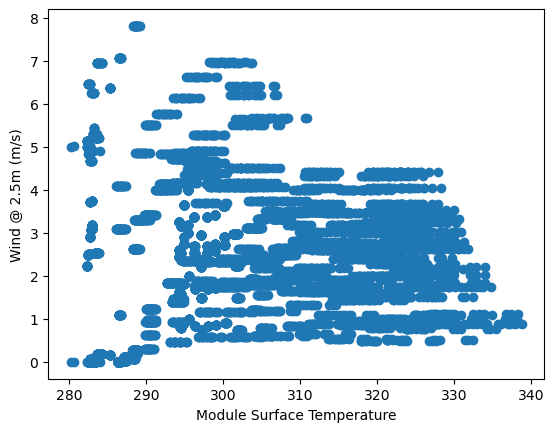

In [15]:
df_time_plot = df_time.copy()
df_time_plot = df_time_plot[(df_time_plot['Wind_@_2.5m_(m/s)']!=0)]
df_time_plot = df_time_plot[(df_time_plot['Module_surface_temp']!=0)]
plt.scatter(df_time_plot['Module_surface_temp'], df_time_plot['Wind_@_2.5m_(m/s)'])
plt.xlabel('Module Surface Temperature')
plt.ylabel('Wind @ 2.5m (m/s)')

This is one a bit more scattered, as we would expect since the correlation value is lower than the previous two

To plot some of the numerical variables that take on discrete values we can use boxplots as they will show the distribution of the module surface temperature at the discrete levels better than a scatter plot can

/Users/emilyweed/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:641: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


<AxesSubplot:xlabel='Panel_height_(m)_categorical', ylabel='Module_surface_temp'>

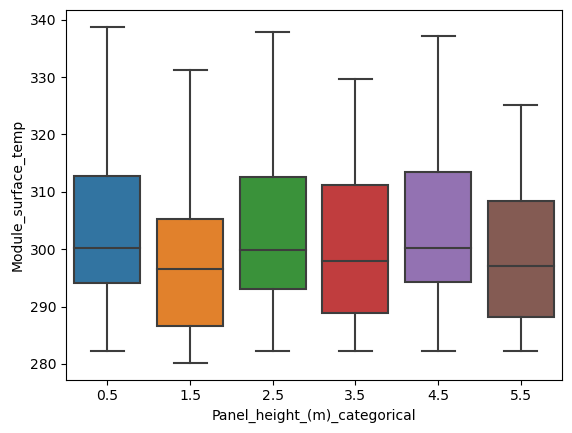

In [16]:
df_time_plot = df_time.copy()
df_time_plot = df_time_plot[(df_time_plot['Module_surface_temp']!=0)]
df_time_plot['Panel_height_(m)_categorical'] = pd.Categorical(df_time_plot['Panel_height_(m)'])
sns.boxplot(x='Panel_height_(m)_categorical', y = 'Module_surface_temp', data = df_time_plot)

Most notable here is the difference in the range of the data between different panel heights

/Users/emilyweed/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:641: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


<AxesSubplot:xlabel='Panel_height_(m)_categorical', ylabel='Average_module_surface_temp'>

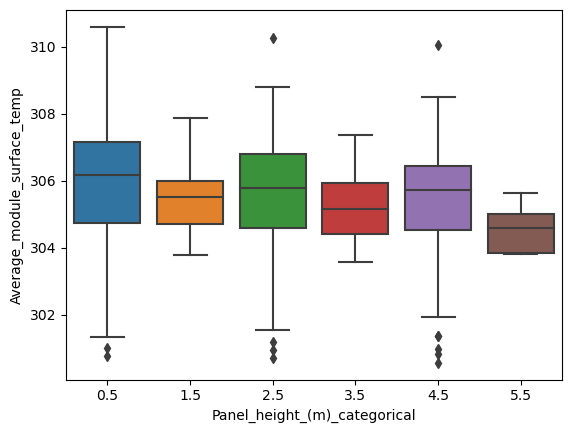

In [17]:
df_sim_plot = df_sim.copy()
#Filtering out the rows with 0s so we can see the relationship
df_sim_plot = df_sim_plot[(df_sim_plot['Average_module_surface_temp']!=0)]
df_sim_plot['Panel_height_(m)_categorical'] = pd.Categorical(df_sim_plot['Panel_height_(m)'])
sns.boxplot(x='Panel_height_(m)_categorical', y = 'Average_module_surface_temp', data = df_sim_plot)

/Users/emilyweed/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:641: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


<AxesSubplot:xlabel='Evapotranspiration_(mm/day)_cat', ylabel='Average_module_surface_temp'>

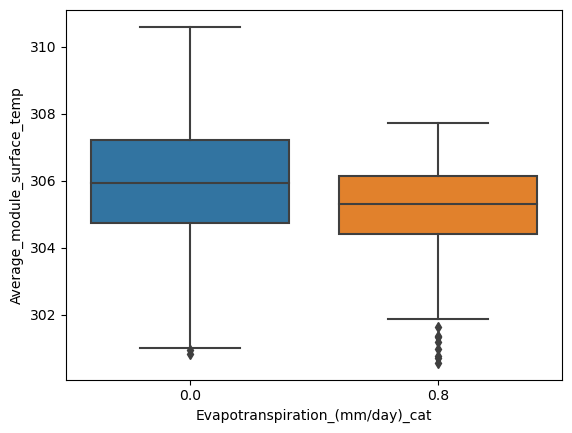

In [18]:
df_sim_plot['Evapotranspiration_(mm/day)_cat'] = pd.Categorical(df_sim_plot['Evapotranspiration_(mm/day)'])
sns.boxplot(x='Evapotranspiration_(mm/day)_cat', y = 'Average_module_surface_temp', data = df_sim_plot)

/Users/emilyweed/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:641: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


<AxesSubplot:xlabel='Evapotranspiration_(mm/day)_cat', ylabel='Module_surface_temp'>

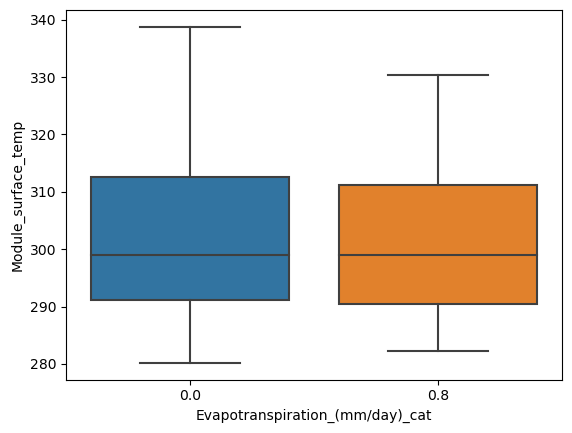

In [19]:
df_time_plot['Evapotranspiration_(mm/day)_cat'] = pd.Categorical(df_time_plot['Evapotranspiration_(mm/day)'])
sns.boxplot(x='Evapotranspiration_(mm/day)_cat', y = 'Module_surface_temp', data = df_time_plot)

#### Missing data / 0 value imputation


We can view the number of 0s in each column. In most columns we expect 0s because that's a valid value for the column. In Module_surface_temp we don't though, and the 0s were introduced based on the formulas I used in Excel to create the CSVs (missing data became 0s, and some simulations were stopped short resulting in 0). Right now I will drop the rows that have 0s for module_surface_temp (****this will avoid the issue with the outliers we were seeing before when they were imputed with the mean****). 

In [20]:
#viewing number of 0s
(df_time == 0).sum(axis=0)

simulationID                         0
Time_(s)                             0
Panel_height_(m)                     0
Row_spacing_(m)                      0
Array_width_(m)                      0
Array_length_(m)                     0
Tilt_angle_(deg)                     0
Mounting_type                        0
Orientation                          0
Total_site_length_(m)                0
Total_site_width_(m)                 0
Evapotranspiration_(mm/day)       4563
Albedo                            3042
Wind_(%_original_value)              0
Radiation_(%_original_value)         0
Temperature_(%_original_value)       0
Temperature_(C)                      0
Wind_@_2.5m_(m/s)                    0
Radiation_(W/m2)                  1134
Module_surface_temp               1745
dtype: int64

In [21]:
(df_sim == 0).sum(axis=0)

simulationID                       0
Panel_height_(m)                   0
Row_spacing_(m)                    0
Array_width_(m)                    0
Array_length_(m)                   0
Tilt_angle_(deg)                   0
Mounting_type                      0
Orientation                        0
Total_site_length_(m)              0
Total_site_width_(m)               0
Evapotranspiration_(mm/day)       72
Albedo                            48
Wind_(%_original_value)            0
Radiation_(%_original_value)       0
Temperature_(%_original_value)     0
Temperature_(C)                    0
Wind_@_2.5m_(m/s)                  0
Radiation_(W/m2)                   0
Average_module_surface_temp        1
dtype: int64

Dropping simulation number 141 since all the output values are empty (0) for that one

In [22]:
df_time = df_time[(df_time['simulationID']!=141)]
df_sim = df_sim[(df_sim['simulationID']!=141)]

Dropping rows where Module_surface_temp is 0 for df_time

In [23]:
df_time = df_time[df_time['Module_surface_temp'] != 0]

In [24]:
(df_time == 0).sum(axis=0)

simulationID                         0
Time_(s)                             0
Panel_height_(m)                     0
Row_spacing_(m)                      0
Array_width_(m)                      0
Array_length_(m)                     0
Tilt_angle_(deg)                     0
Mounting_type                        0
Orientation                          0
Total_site_length_(m)                0
Total_site_width_(m)                 0
Evapotranspiration_(mm/day)       3690
Albedo                            2411
Wind_(%_original_value)              0
Radiation_(%_original_value)         0
Temperature_(%_original_value)       0
Temperature_(C)                      0
Wind_@_2.5m_(m/s)                    0
Radiation_(W/m2)                   989
Module_surface_temp                  0
dtype: int64

### Feature Selection - WITH TIME

I will perform 3 different types of feature selection: forwards stepwise, backwards stepwise and best subset selection. They will most likely result in very similar sets of features (if not the exact same). Also these may change when I start making models, this just gives a good starting point.

I will run each feature selection method with each of the models I plan to use in the modeling portion (Linear regression, support vector regression, random forest regression, and gradient boosted trees). For the models that require hyperparameter tuning, I will just leave the defaults since I am not interested in hyperparameter tuning at this step, just feature selection. 

I will drop the features that are all the same value at this point since they will not add any predictive power (and will just give NaNs for the score anyways). I will also create the train test split here, and proceed with the training set until the very end (final model evaluation)

Before performing any feature selection processes, I will center and scale the data. I will use this scaled data for the remainder of the notebook as well

In [75]:
#Necessary imports
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS #for best subsets
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler #scale and center data

In [76]:
#Separating target variable from features, and pulling out possible features
df_time_x = df_time[['Time_(s)','Panel_height_(m)', 'Evapotranspiration_(mm/day)', 'Albedo', 'Temperature_(C)', 'Wind_@_2.5m_(m/s)', 'Radiation_(W/m2)']]
df_time_y = df_time['Module_surface_temp']

df_sim_x = df_sim[['Panel_height_(m)', 'Evapotranspiration_(mm/day)', 'Albedo', 'Temperature_(C)', 'Wind_@_2.5m_(m/s)', 'Radiation_(W/m2)']]
df_sim_y = df_sim['Average_module_surface_temp']


In [77]:
#Train test split
time_x_train, time_x_test, time_y_train, time_y_test = train_test_split(df_time_x, df_time_y, test_size=0.20, random_state=2022)
sim_x_train, sim_x_test, sim_y_train, sim_y_test = train_test_split(df_sim_x, df_sim_y, test_size = 0.20, random_state=2022)


In [78]:
#Feature Scaling
sc_X = StandardScaler()
#Training data
time_x_train_scaled = time_x_train.copy()
time_x_train_scaled[time_x_train_scaled.columns] = sc_X.fit_transform(time_x_train[time_x_train.columns])
time_x_train_scaled = time_x_train_scaled.reset_index(drop=True)
#Testing data
time_x_test_scaled = time_x_test.copy()
time_x_test_scaled[time_x_test_scaled.columns] = sc_X.fit_transform(time_x_test[time_x_test.columns])
time_x_test_scaled = time_x_test_scaled.reset_index(drop=True)

In [342]:
#Forward selection
lr_model = LinearRegression()
svr_model = SVR(kernel = 'rbf')
rfr_model = RandomForestRegressor()
gbt_model = GradientBoostingRegressor()

# Build step forward feature selection, one for each model i will use later on
fss_lr = sfs(lr_model, k_features = 7, forward=True, floating=False, scoring='r2',cv=5)
fss_svr = sfs(svr_model, k_features = 7, forward=True, floating=False, scoring='r2',cv=5)
fss_rfr = sfs(rfr_model, k_features = 7, forward=True, floating=False, scoring='r2',cv=5)
fss_gbt = sfs(gbt_model, k_features = 7, forward=True, floating=False, scoring='r2',cv=5)

# Perform FSS
fss_lr_fit = fss_lr.fit(time_x_train_scaled, time_y_train)
fss_svr_fit = fss_svr.fit(time_x_train_scaled, time_y_train)
fss_rfr_fit = fss_rfr.fit(time_x_train_scaled, time_y_train)
fss_gbt_fit = fss_gbt.fit(time_x_train_scaled, time_y_train)

Text(0.5, 1.0, 'Forward Stepwise Selection')

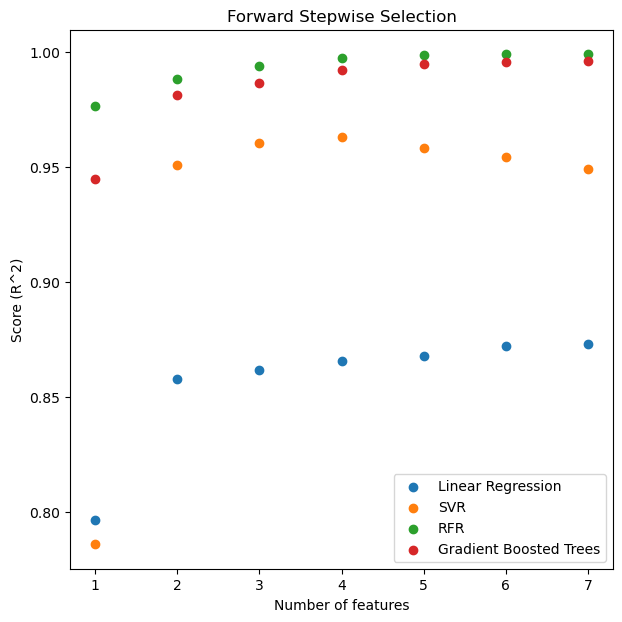

In [344]:
#Plotting the score for each subset of features selected to see where / if it levels off
number_of_features = list(range(1,8))
scores_lr = []
scores_svr = []
scores_rfr = []
scores_gbt = []
for i in range(1,len(fss_lr.subsets_)+1):
    scores_lr.append(fss_lr_fit.subsets_[i]['avg_score'])
    scores_svr.append(fss_svr_fit.subsets_[i]['avg_score'])
    scores_rfr.append(fss_rfr_fit.subsets_[i]['avg_score'])
    scores_gbt.append(fss_gbt_fit.subsets_[i]['avg_score'])
    
plt.scatter(number_of_features, scores_lr, label = "Linear Regression")
plt.scatter(number_of_features, scores_svr, label = "SVR")
plt.scatter(number_of_features, scores_rfr, label = "RFR")
plt.scatter(number_of_features, scores_gbt, label = "Gradient Boosted Trees")
plt.legend(loc = "lower right")
plt.xlabel("Number of features")
plt.ylabel("Score (R^2)")
plt.title("Forward Stepwise Selection")

It looks like it levels off around 5 - 6 features. Printing out those specific features chosen:

In [345]:
print("Linear regression 5 features subset: ",fss_lr_fit.subsets_[5]['feature_names'])
print("Linear regression 6 features subset: ",fss_lr_fit.subsets_[6]['feature_names'])
print("SVR 5 features subset: ",fss_svr_fit.subsets_[5]['feature_names'])
print("SVR 6 features subset: ",fss_svr_fit.subsets_[6]['feature_names'])
print("RFR 5 features subset: ",fss_rfr_fit.subsets_[5]['feature_names'])
print("RFR 6 features subset: ",fss_rfr_fit.subsets_[6]['feature_names'])
print("GBT 5 features subset: ",fss_gbt_fit.subsets_[5]['feature_names'])
print("GBT 6 features subset: ",fss_gbt_fit.subsets_[6]['feature_names'])

Linear regression 5 features subset:  ('Time_(s)', 'Panel_height_(m)', 'Albedo', 'Temperature_(C)', 'Radiation_(W/m2)')
Linear regression 6 features subset:  ('Time_(s)', 'Panel_height_(m)', 'Albedo', 'Temperature_(C)', 'Wind_@_2.5m_(m/s)', 'Radiation_(W/m2)')
SVR 5 features subset:  ('Time_(s)', 'Albedo', 'Temperature_(C)', 'Wind_@_2.5m_(m/s)', 'Radiation_(W/m2)')
SVR 6 features subset:  ('Time_(s)', 'Evapotranspiration_(mm/day)', 'Albedo', 'Temperature_(C)', 'Wind_@_2.5m_(m/s)', 'Radiation_(W/m2)')
RFR 5 features subset:  ('Panel_height_(m)', 'Evapotranspiration_(mm/day)', 'Albedo', 'Wind_@_2.5m_(m/s)', 'Radiation_(W/m2)')
RFR 6 features subset:  ('Panel_height_(m)', 'Evapotranspiration_(mm/day)', 'Albedo', 'Temperature_(C)', 'Wind_@_2.5m_(m/s)', 'Radiation_(W/m2)')
GBT 5 features subset:  ('Evapotranspiration_(mm/day)', 'Albedo', 'Temperature_(C)', 'Wind_@_2.5m_(m/s)', 'Radiation_(W/m2)')
GBT 6 features subset:  ('Time_(s)', 'Evapotranspiration_(mm/day)', 'Albedo', 'Temperature_(C)'

Backwards Stepwise Selection

In [346]:
# Build backwards stepwise feature selection
bss_lr = sfs(lr_model, k_features = 1, forward=False, floating=False, scoring='r2', cv=5)
bss_svr = sfs(svr_model, k_features = 1, forward=False, floating=False, scoring='r2', cv=5)
bss_rfr = sfs(rfr_model, k_features = 1, forward=False, floating=False, scoring='r2', cv=5)
bss_gbt = sfs(gbt_model, k_features = 1, forward=False, floating=False, scoring='r2', cv=5)

# Perform BSS
bss_lr_fit = bss_lr.fit(time_x_train_scaled, time_y_train)
bss_svr_fit = bss_svr.fit(time_x_train_scaled, time_y_train)
bss_rfr_fit = bss_rfr.fit(time_x_train_scaled, time_y_train)
bss_gbt_fit = bss_gbt.fit(time_x_train_scaled, time_y_train)

Text(0.5, 1.0, 'Forward Stepwise Selection')

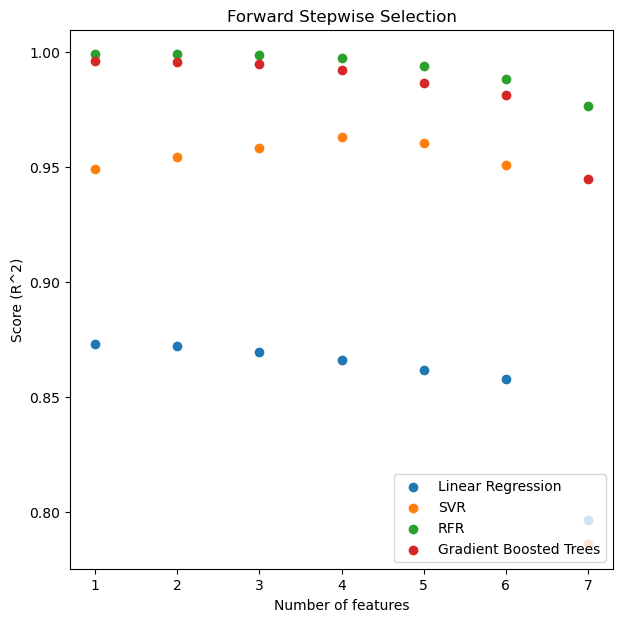

In [347]:
#Plotting the score for each subset of features selected to see where / if it levels off
number_of_features = list(range(7,0,-1))
scores_lr = []
scores_svr = []
scores_rfr = []
scores_gbt = []
for i in range(1,len(bss_lr.subsets_)+1):
    scores_lr.append(bss_lr_fit.subsets_[i]['avg_score'])
    scores_svr.append(bss_svr_fit.subsets_[i]['avg_score'])
    scores_rfr.append(bss_rfr_fit.subsets_[i]['avg_score'])
    scores_gbt.append(bss_gbt_fit.subsets_[i]['avg_score'])
    
plt.scatter(number_of_features, scores_lr, label = "Linear Regression")
plt.scatter(number_of_features, scores_svr, label = "SVR")
plt.scatter(number_of_features, scores_rfr, label = "RFR")
plt.scatter(number_of_features, scores_gbt, label = "Gradient Boosted Trees")
plt.legend(loc = "lower right")
plt.xlabel("Number of features")
plt.ylabel("Score (R^2)")
plt.title("Backwards Stepwise Selection")

This plots looks pretty similar to the forwards stepwise selection plot, indicating they may have selected the same subset of features

In [348]:
print("Linear regression 5 features subset: ",bss_lr_fit.subsets_[5]['feature_names'])
print("Linear regression 6 features subset: ",bss_lr_fit.subsets_[6]['feature_names'])
print("SVR 5 features subset: ",bss_svr_fit.subsets_[5]['feature_names'])
print("SVR 6 features subset: ",bss_svr_fit.subsets_[6]['feature_names'])
print("RFR 5 features subset: ",bss_rfr_fit.subsets_[5]['feature_names'])
print("RFR 6 features subset: ",bss_rfr_fit.subsets_[6]['feature_names'])
print("GBT 5 features subset: ",bss_gbt_fit.subsets_[5]['feature_names'])
print("GBT 6 features subset: ",bss_gbt_fit.subsets_[6]['feature_names'])

Linear regression 5 features subset:  ('Time_(s)', 'Albedo', 'Temperature_(C)', 'Wind_@_2.5m_(m/s)', 'Radiation_(W/m2)')
Linear regression 6 features subset:  ('Time_(s)', 'Panel_height_(m)', 'Albedo', 'Temperature_(C)', 'Wind_@_2.5m_(m/s)', 'Radiation_(W/m2)')
SVR 5 features subset:  ('Time_(s)', 'Albedo', 'Temperature_(C)', 'Wind_@_2.5m_(m/s)', 'Radiation_(W/m2)')
SVR 6 features subset:  ('Time_(s)', 'Evapotranspiration_(mm/day)', 'Albedo', 'Temperature_(C)', 'Wind_@_2.5m_(m/s)', 'Radiation_(W/m2)')
RFR 5 features subset:  ('Panel_height_(m)', 'Evapotranspiration_(mm/day)', 'Albedo', 'Wind_@_2.5m_(m/s)', 'Radiation_(W/m2)')
RFR 6 features subset:  ('Panel_height_(m)', 'Evapotranspiration_(mm/day)', 'Albedo', 'Temperature_(C)', 'Wind_@_2.5m_(m/s)', 'Radiation_(W/m2)')
GBT 5 features subset:  ('Evapotranspiration_(mm/day)', 'Albedo', 'Temperature_(C)', 'Wind_@_2.5m_(m/s)', 'Radiation_(W/m2)')
GBT 6 features subset:  ('Time_(s)', 'Evapotranspiration_(mm/day)', 'Albedo', 'Temperature_(C)

Now let's do best subsets feature selection. This method compares every possible combination of features to find the best subset

Features: 127/127

Text(0, 0.5, 'Score (R^2)')

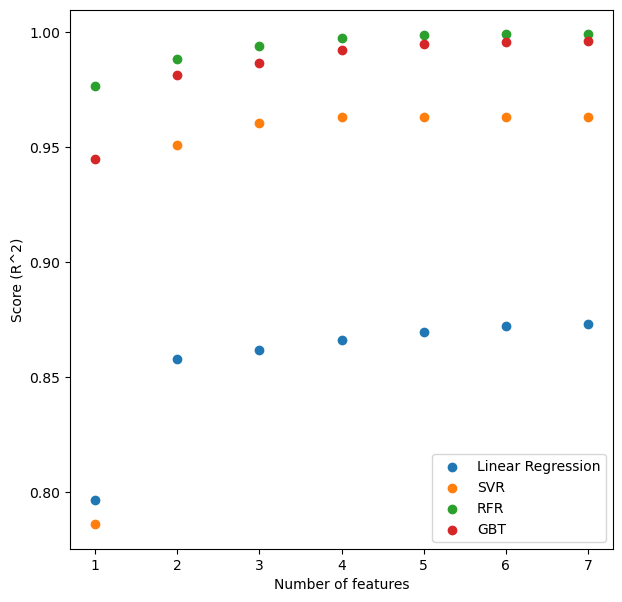

In [349]:
#putting it inside a for loop, changing max number of features, keeping track of best score for each subset and plotting
num_features = list(range(1,8))
best_scores_lr = []
fits_lr = []
best_scores_svr = []
fits_svr = []
best_scores_rfr = []
fits_rfr = []
best_scores_gbt = []
fits_gbt = []
for i in range(1,8):
    bss_lr = EFS(lr_model,min_features=1,max_features=i,scoring='r2',print_progress=True,cv=5)
    bss_lr_fit = bss_lr.fit(time_x_train_scaled, time_y_train)
    best_scores_lr.append(bss_lr_fit.best_score_)
    fits_lr.append(bss_lr_fit)
    
    bss_svr = EFS(svr_model,min_features=1,max_features=i,scoring='r2',print_progress=True,cv=5)
    bss_svr_fit = bss_svr.fit(time_x_train_scaled, time_y_train)
    best_scores_svr.append(bss_svr_fit.best_score_)
    fits_svr.append(bss_svr_fit)
    
    bss_rfr = EFS(rfr_model,min_features=1,max_features=i,scoring='r2',print_progress=True,cv=5)
    bss_rfr_fit = bss_rfr.fit(time_x_train_scaled, time_y_train)
    best_scores_rfr.append(bss_rfr_fit.best_score_)
    fits_rfr.append(bss_rfr_fit)
    
    bss_gbt = EFS(gbt_model,min_features=1,max_features=i,scoring='r2',print_progress=True,cv=5)
    bss_gbt_fit = bss_gbt.fit(time_x_train_scaled, time_y_train)
    best_scores_gbt.append(bss_gbt_fit.best_score_)
    fits_gbt.append(bss_gbt_fit)
    
    
plt.scatter(num_features,best_scores_lr, label = "Linear Regression")
plt.scatter(num_features,best_scores_svr, label = "SVR")
plt.scatter(num_features,best_scores_rfr, label = "RFR")
plt.scatter(num_features,best_scores_gbt, label = "GBT")
plt.legend(loc = 'lower right')
plt.xlabel('Number of features')
plt.ylabel("Score (R^2)")


Again this plot looks very similar, indicating it probably choose the same subset of features as our previous 2 methods. Printing out the best 5 and 6 features

In [350]:
print("Linear regression 5 features subset: ",bss_lr_fit.subsets_[5]['feature_names'])
print("Linear regression 6 features subset: ",bss_lr_fit.subsets_[6]['feature_names'])
print("SVR 5 features subset: ",bss_svr_fit.subsets_[5]['feature_names'])
print("SVR 6 features subset: ",bss_svr_fit.subsets_[6]['feature_names'])
print("RFR 5 features subset: ",bss_rfr_fit.subsets_[5]['feature_names'])
print("RFR 6 features subset: ",bss_rfr_fit.subsets_[6]['feature_names'])
print("GBT 5 features subset: ",bss_gbt_fit.subsets_[5]['feature_names'])
print("GBT 6 features subset: ",bss_gbt_fit.subsets_[6]['feature_names'])

Linear regression 5 features subset:  ('Wind_@_2.5m_(m/s)',)
Linear regression 6 features subset:  ('Radiation_(W/m2)',)
SVR 5 features subset:  ('Wind_@_2.5m_(m/s)',)
SVR 6 features subset:  ('Radiation_(W/m2)',)
RFR 5 features subset:  ('Wind_@_2.5m_(m/s)',)
RFR 6 features subset:  ('Radiation_(W/m2)',)
GBT 5 features subset:  ('Wind_@_2.5m_(m/s)',)
GBT 6 features subset:  ('Radiation_(W/m2)',)


Based on the 3 feature selection methods performed above, the subset of 5 features that have the most predictive power are `'Time_(s)', 'Albedo', 'Temperature_(C)', 'Wind_@_2.5m_(m/s)', 'Radiation_(W/m2)'`. The subset of 6 features are the ones included in the 5 features subset with the addition of `'Evapotranspiration_(mm/day)'`. As the difference in 5 vs 6 features doesn't change much in the interpretablility of the model (6 features is still a reasonable amount), and it provides an increase in the score, I will proceed with the modeling using the 6 features.

### Feature Selection - WITHOUT TIME

I will do the same exact process as above, just with removing the Time_(s) feature at the beginning

In [79]:
#dropping time
time_x_train_scaled_no_time = time_x_train_scaled.drop('Time_(s)', axis=1)
time_x_test_scaled_no_time = time_x_test_scaled.drop('Time_(s)', axis=1)

Forward Step Wise Selection

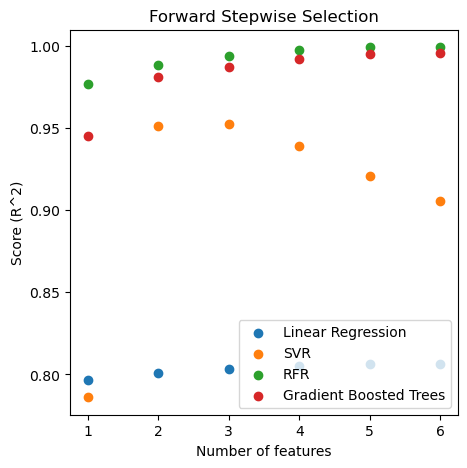

In [536]:
#Forward selection
lr_model = LinearRegression()
svr_model = SVR(kernel = 'rbf')
rfr_model = RandomForestRegressor()
gbt_model = GradientBoostingRegressor()

# Build step forward feature selection, one for each model i will use later on
fss_lr = sfs(lr_model, k_features = 6, forward=True, floating=False, scoring='r2',cv=5)
fss_svr = sfs(svr_model, k_features = 6, forward=True, floating=False, scoring='r2',cv=5)
fss_rfr = sfs(rfr_model, k_features = 6, forward=True, floating=False, scoring='r2',cv=5)
fss_gbt = sfs(gbt_model, k_features = 6, forward=True, floating=False, scoring='r2',cv=5)

# Perform FSS
fss_lr_fit = fss_lr.fit(time_x_train_scaled_no_time, time_y_train)
fss_svr_fit = fss_svr.fit(time_x_train_scaled_no_time, time_y_train)
fss_rfr_fit = fss_rfr.fit(time_x_train_scaled_no_time, time_y_train)
fss_gbt_fit = fss_gbt.fit(time_x_train_scaled_no_time, time_y_train)


#plotting
number_of_features = list(range(1,7))
scores_lr = []
scores_svr = []
scores_rfr = []
scores_gbt = []
for i in range(1,len(fss_lr.subsets_)+1):
    scores_lr.append(fss_lr_fit.subsets_[i]['avg_score'])
    scores_svr.append(fss_svr_fit.subsets_[i]['avg_score'])
    scores_rfr.append(fss_rfr_fit.subsets_[i]['avg_score'])
    scores_gbt.append(fss_gbt_fit.subsets_[i]['avg_score'])

plt.rcParams["figure.figsize"] = (5,5)
plt.scatter(number_of_features, scores_lr, label = "Linear Regression")
plt.scatter(number_of_features, scores_svr, label = "SVR")
plt.scatter(number_of_features, scores_rfr, label = "RFR")
plt.scatter(number_of_features, scores_gbt, label = "Gradient Boosted Trees")
plt.legend(loc = "lower right")
plt.xlabel("Number of features")
plt.ylabel("Score (R^2)")
plt.title("Forward Stepwise Selection")
plt.savefig('fss_no_time.png') #this saves the plot in the same directory as this notebook is in

Backwards Stepwise Selection

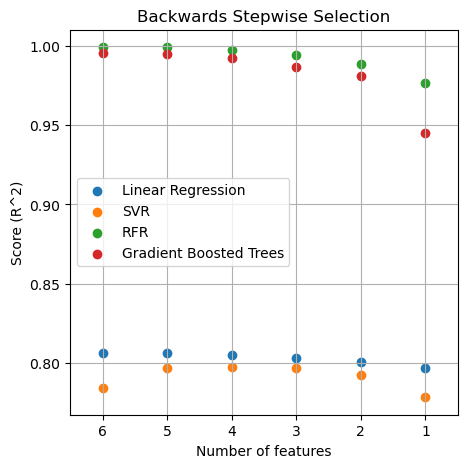

In [169]:
lr_model = LinearRegression()
svr_model = SVR()
rfr_model = RandomForestRegressor()
gbt_model = GradientBoostingRegressor()

# Build backwards stepwise feature selection
bss_lr = sfs(lr_model, k_features = 1, forward=False, floating=False, scoring='r2', cv=5)
bss_svr = sfs(svr_model, k_features = 1, forward=False, floating=False, scoring='r2', cv=5)
bss_rfr = sfs(rfr_model, k_features = 1, forward=False, floating=False, scoring='r2', cv=5)
bss_gbt = sfs(gbt_model, k_features = 1, forward=False, floating=False, scoring='r2', cv=5)

# Perform BSS
bss_lr_fit = bss_lr.fit(time_x_train_scaled_no_time, time_y_train)
bss_svr_fit = bss_svr.fit(time_x_train_scaled_no_time, time_y_train)
bss_rfr_fit = bss_rfr.fit(time_x_train_scaled_no_time, time_y_train)
bss_gbt_fit = bss_gbt.fit(time_x_train_scaled_no_time, time_y_train)

#plotting
number_of_features = list(range(6,0,-1))
scores_lr = []
scores_svr = []
scores_rfr = []
scores_gbt = []
for i in range(len(bss_lr.subsets_),0,-1):
    scores_lr.append(bss_lr_fit.subsets_[i]['avg_score'])
    scores_svr.append(bss_svr_fit.subsets_[i]['avg_score'])
    scores_rfr.append(bss_rfr_fit.subsets_[i]['avg_score'])
    scores_gbt.append(bss_gbt_fit.subsets_[i]['avg_score'])
    
plt.rcParams["figure.figsize"] = (5,5)
plt.scatter(number_of_features, scores_lr, label = "Linear Regression")
plt.scatter(number_of_features, scores_svr, label = "SVR")
plt.scatter(number_of_features, scores_rfr, label = "RFR")
plt.scatter(number_of_features, scores_gbt, label = "Gradient Boosted Trees")
plt.legend(loc = "center left")
plt.xlim(6.5,0.5)
plt.xlabel("Number of features")
plt.ylabel("Score (R^2)")
plt.grid(visible=True)
plt.title("Backwards Stepwise Selection")
plt.savefig('backss_no_time.png')

In [152]:
range(len(bss_lr.subsets_),0,-1)

range(6, 0, -1)

Best Subsets selection

Features: 63/63

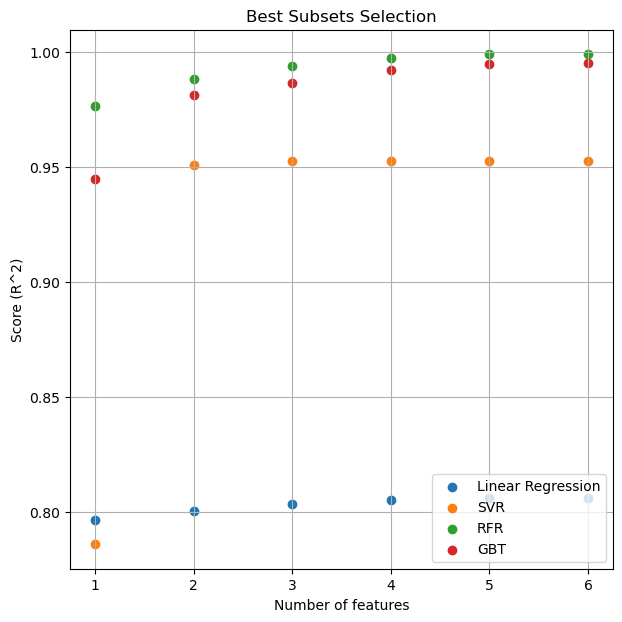

In [64]:
num_features = list(range(1,7))
best_scores_lr = []
fits_lr = []
best_scores_svr = []
fits_svr = []
best_scores_rfr = []
fits_rfr = []
best_scores_gbt = []
fits_gbt = []
for i in range(1,7):
    bss_lr = EFS(lr_model,min_features=1,max_features=i,scoring='r2',print_progress=True,cv=5)
    bss_lr_fit = bss_lr.fit(time_x_train_scaled_no_time, time_y_train)
    best_scores_lr.append(bss_lr_fit.best_score_)
    fits_lr.append(bss_lr_fit)
    
    bss_svr = EFS(svr_model,min_features=1,max_features=i,scoring='r2',print_progress=True,cv=5)
    bss_svr_fit = bss_svr.fit(time_x_train_scaled_no_time, time_y_train)
    best_scores_svr.append(bss_svr_fit.best_score_)
    fits_svr.append(bss_svr_fit)
    
    bss_rfr = EFS(rfr_model,min_features=1,max_features=i,scoring='r2',print_progress=True,cv=5)
    bss_rfr_fit = bss_rfr.fit(time_x_train_scaled_no_time, time_y_train)
    best_scores_rfr.append(bss_rfr_fit.best_score_)
    fits_rfr.append(bss_rfr_fit)
    
    bss_gbt = EFS(gbt_model,min_features=1,max_features=i,scoring='r2',print_progress=True,cv=5)
    bss_gbt_fit = bss_gbt.fit(time_x_train_scaled_no_time, time_y_train)
    best_scores_gbt.append(bss_gbt_fit.best_score_)
    fits_gbt.append(bss_gbt_fit)
    
    
plt.scatter(num_features,best_scores_lr, label = "Linear Regression")
plt.scatter(num_features,best_scores_svr, label = "SVR")
plt.scatter(num_features,best_scores_rfr, label = "RFR")
plt.scatter(num_features,best_scores_gbt, label = "GBT")
plt.legend(loc = 'lower right')
plt.xlabel('Number of features')
plt.ylabel("Score (R^2)")
plt.title("Best Subsets Selection")
plt.grid(visible=True)
plt.savefig('bestss_no_time.png')

In [69]:
#Looking at selections for FSS & backwardsSS - long output so commented out for now
print(fss_lr_fit.subsets_)
print(fss_svr_fit.subsets_)
print(fss_rfr_fit.subsets_)
print(fss_gbt_fit.subsets_)
print(bss_lr_fit.subsets_)
print(bss_svr_fit.subsets_)
print(bss_rfr_fit.subsets_)
print(bss_gbt_fit.subsets_)

{1: {'feature_idx': (5,), 'cv_scores': array([0.78464682, 0.80704746, 0.79897158, 0.7937889 , 0.78844917]), 'avg_score': 0.794580786796755, 'feature_names': ('Radiation_(W/m2)',)}, 2: {'feature_idx': (2, 5), 'cv_scores': array([0.78951308, 0.81164696, 0.80334198, 0.79596913, 0.79472205]), 'avg_score': 0.7990386418152552, 'feature_names': ('Albedo', 'Radiation_(W/m2)')}, 3: {'feature_idx': (0, 2, 5), 'cv_scores': array([0.79275781, 0.81286015, 0.80445599, 0.79982946, 0.79515493]), 'avg_score': 0.8010116689715725, 'feature_names': ('Panel_height_(m)', 'Albedo', 'Radiation_(W/m2)')}, 4: {'feature_idx': (0, 2, 4, 5), 'cv_scores': array([0.79465537, 0.81597383, 0.80551605, 0.8002842 , 0.79613652]), 'avg_score': 0.8025131954491773, 'feature_names': ('Panel_height_(m)', 'Albedo', 'Wind_@_2.5m_(m/s)', 'Radiation_(W/m2)')}, 5: {'feature_idx': (0, 1, 2, 4, 5), 'cv_scores': array([0.79531639, 0.81658813, 0.80644002, 0.80146082, 0.79858944]), 'avg_score': 0.8036789593705667, 'feature_names': ('Pan

For each of these models except random forest regressor, Radiation was the most important feature (added first in forward stepwise selection, and removed last in backwards stepwise selection). Random forest regressor added Wind first, followed by radiation. Overall, our results showed an improvement in score when using all 6 features as opposed to a subset of 5. Since we would like to utilize this model for optimization purposes, including more features will be helpful and there doesn't indiciate any issue with overfitting. Thus we will proceed with all 6 features moving forwards

### Models - WITH TIME AS A FEATURE

we decided to use the model without time as a feature, I just left this code in here for reference

##### Starting with time level data

In [30]:
import seaborn as sns #allows for better plots
import sklearn
from statistics import mean
from sklearn.model_selection import KFold #KFold Cross Validation
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

##### Linear Regression
Starting with Linear Regression, which is the simplest of all the models I will explore. There are no hyperparameters to tune for this model


In [ ]:
# 5 fold cross validation to get more accurate estimate of the error of the model 
kf = KFold(n_splits=5)
mses = []
scores = []
predictions = []
y_test_values = []
nrmses = []
for train_index, test_index in kf.split(time_x_train_scaled):
    X_train = time_x_train_scaled.iloc[train_index]
    Y_train = time_y_train.iloc[train_index]
    X_test = time_x_train_scaled.iloc[test_index]
    Y_test = time_y_train.iloc[test_index]
    model = LinearRegression()
    m = model.fit(X_train, Y_train)
    preds = model.predict(X_test)
    y_test_values.append(Y_test)
    predictions.append(preds)
    mses.append(mean_squared_error(Y_test, preds))
    nrmses.append(np.sqrt((mean_squared_error(Y_test, preds))/mean(Y_test)))
    scores.append(model.score(X_test,Y_test))
    
print("MSE:",mean(mses))
print("NRMSE:", mean(nrmses))
print("R^2:",mean(scores))

Based on the values printed above, Simple Linear regression is likely not to be the best model for our data. This could be due to the presence of nonlinear relationships in our data that were not identified by the plots above. 

The 5 fold cross validation average MSE value is a bit high when considering the range of our output values. The average $R^2$ is pretty high, but could be better. 

In [ ]:
#plotting the predicitions vs the true values, each fold is a different color
plt.rcParams["figure.figsize"] = (15,10)
for i in range(5):
    plt.scatter(y_test_values[i], predictions[i],  alpha = 0.4)
    
plt.plot([min(y_test_values[0]), max(y_test_values[0])], [min(y_test_values[0]), max(y_test_values[0])], 'b-')
plt.xlabel('True')
plt.ylabel("Predicted")
plt.title("Predicted vs. True Linear Regression")
plt.grid()

In [ ]:
plt.rcParams["figure.figsize"] = (15,10)

#This will plot just the predictions vs. true for the first fold we used (somewhat easier to see the points, 
#but overall the trend in the same)
plt.scatter(y_test_values[0], predictions[0],  alpha = 0.4)
    
plt.plot([min(y_test_values[0]), max(y_test_values[0])], [min(y_test_values[0]), max(y_test_values[0])], 'b-')
plt.xlabel('True')
plt.ylabel("Predicted")
plt.title("Predicted vs. True Linear Regression")
plt.grid()

This plot above shows the True Module Surface Temperautre vs. the predicted Module surface temperature. The blue line represents perfect predictions. The distance of the points from that line indicate how far off the predictions are. Based on this plot we can see a bit of trend (overpredicting at the beginning/middle, and underpredicting towards the end). This indicates a poor linear fit. We can confirm this by looking at the residual plot (should see a trend)

In [ ]:
# sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize =(5,5))
sns.regplot(x=preds,y=Y_test-preds,ax=ax,lowess=True)
ax.set(ylabel='residuals',xlabel='fitted values')

As expected there is a trend in the residual plot, indicating a poor fit for linear regression. The residuals are the difference between the true value and the predicted value, $Y_{true} - Y_{predicted}$. This plot shows the residuals for the last iteration through 5 fold cv, but all iterations show the same pattern, which is not an ideal result.

##### Support Vector Regression

The scaling of our features that we performed previously is important for this model because it is computing distances to a hyperplane. Features with a naturally larger range would be weighted higher without scaling.

For this model there are two main hyperparameters to tune: $C$ and $\gamma$. Based on literature the ranges for these values that should be explored are $C \in \{0.1,1,10,100\}$ and $\gamma \in \{0.1, 0.01, 0.001, 0.0001\}$. We can preform this hyperparameter tuning using GridSearch.



See this [link](https://towardsdatascience.com/an-introduction-to-support-vector-regression-svr-a3ebc1672c2) for more details on SVR.

[Sklearn's documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)

In [ ]:
# Grid search for hyperparameter tuning
# This will take a while to run, so idealy only want to run this block once upon notebook start up

params = {'C' : [0.1,1,10,100], 'gamma' : [0.1,0.01,0.001, 0.0001]},
modelsvr = SVR(kernel = 'rbf')
grids = GridSearchCV(modelsvr, params, cv = 5, verbose = 3) #verbose argument configures what is printed out during training
grids.fit(time_x_train_scaled,time_y_train)


In [ ]:
#this prints the best hyperparameters for our model
print(grids.best_estimator_)

In [ ]:
#Lengthy, but gives full output of GridSearch, useful information
grids.cv_results_

In [ ]:
#5 fold cross validation with best parameters determined by Grid Search
kf = KFold(n_splits=5)
mses = []
scores = []
predictions = []
y_test_values = []
nrmses = []
for train_index, test_index in kf.split(time_x_train_scaled):
    X_train = time_x_train_scaled.iloc[train_index]
    Y_train = time_y_train.iloc[train_index]
    X_test = time_x_train_scaled.iloc[test_index]
    Y_test = time_y_train.iloc[test_index]
    model = SVR(kernel='rbf', C = 100, gamma = 0.1)
    m = model.fit(X_train, Y_train)
    preds = model.predict(X_test)
    y_test_values.append(Y_test)
    predictions.append(preds)
    mses.append(mean_squared_error(Y_test, preds))
    nrmses.append(np.sqrt((mean_squared_error(Y_test, preds))/mean(Y_test)))
    scores.append(model.score(X_test,Y_test))
    
print("MSE:",mean(mses))
print("NRMSE:", mean(nrmses))
print("R^2:",mean(scores))

In [ ]:
#plotting the predicitions vs the true values
plt.rcParams["figure.figsize"] = (15,10)
for i in range(5):
    plt.scatter(y_test_values[i], predictions[i],  alpha = 0.4)
    
plt.plot([min(y_test_values[0]), max(y_test_values[0])], [min(y_test_values[0]), max(y_test_values[0])], 'b-')
plt.xlabel('True')
plt.ylabel("Predicted")
plt.title("Predicted vs. True for Support Vector Regressor")
plt.grid(visible=True)

##### Random Forest Regressor

The random forest regressor uses ensemble learning methods with the decision trees to create multiple randomly drawn decision trees from the data, averaging the results to output a prediction. To run this model, the best depth, max_features, min_samples_split, and n_estimators for the decision trees will be tuned. 

See more details [here](https://harvard-iacs.github.io/2017-CS109A/lectures/lecture15/presentation/lecture15_RandomForest.pdf) and [here](https://towardsdatascience.com/random-forest-regression-5f605132d19d). 

[Sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [121]:
#parameter grid - again takes a while to run since it's fitting so many models
params = {'max_depth': np.array(range(1,31)),'max_features': [2, 3, 4, 5, 6],'min_samples_split': [2, 4, 8, 10, 12],'n_estimators': [100, 200, 300, 1000]}
rfr = RandomForestRegressor()
grids = GridSearchCV(estimator = rfr, param_grid = params, cv = 5, n_jobs = -1, verbose = 2)
grids.fit(time_x_train_scaled_no_time,time_y_train)


In [ ]:
#Now using 5 fold CV with our best hyperparameters to evaluate the overall performance of the model 
kf = KFold(n_splits=5)
mses = []
scores = []
predictions = []
y_test_values = []
nrmses = []
for train_index, test_index in kf.split(time_x_train_scaled):
    X_train = time_x_train_scaled.iloc[train_index]
    Y_train = time_y_train.iloc[train_index]
    X_test = time_x_train_scaled.iloc[test_index]
    Y_test = time_y_train.iloc[test_index]
    model = RandomForestRegressor(max_depth=10, random_state=0)
    m = model.fit(X_train, Y_train)
    preds = model.predict(X_test)
    y_test_values.append(Y_test)
    predictions.append(preds)
    mses.append(mean_squared_error(Y_test, preds))
    nrmses.append(np.sqrt((mean_squared_error(Y_test, preds))/mean(Y_test)))
    scores.append(model.score(X_test,Y_test))
    
print("MSE:",mean(mses))
print("NRMSE:",mean(nrmses))
print("R^2:",mean(scores))

This gives much better results than the linear regression did!

We can also look at feature importance (which features were used to split at each iteration in the averaged decision trees

In [ ]:
m = RandomForestRegressor(max_depth=10)
m.fit(time_x_train_scaled,time_y_train)
plt.barh(list(time_x_train_scaled.columns), m.feature_importances_)
plt.xlabel("Gini Importance")

Based on the plot above we can see that Radiation had the highest importance value by far, followed by Temperature and Time

In [ ]:
#plotting the predicitions vs the true values
plt.rcParams["figure.figsize"] = (15,10)
for i in range(5):
    plt.scatter(y_test_values[i], predictions[i],  alpha = 0.4)
    
plt.plot([min(y_test_values[0]), max(y_test_values[0])], [min(y_test_values[0]), max(y_test_values[0])], 'b-')
plt.xlabel('True')
plt.ylabel("Predicted")
plt.title("Predicted vs. True for Random Forest Regressor")
plt.grid(visible = True)

This graph looks much better than linear regression. There isn't a clear pattern in overpredicting/underpredicting.

##### Gradient Boosted Trees

Boosting sequentially combines a bunch of weak learners where each tree is fit the residual/error of the previous learner. The three most important parameters to tune are number of trees (n_estimators), tree depth (max_depth), subsample size used to train each tree (subsample) and step size (learning_rate). 


See documentation here.

[Sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)

In [ ]:
#Hyperparameter tuning, ranges chosen based on common values chosen in literature - takes roughly 40 minutes to run
#only want to rerun this when we make changes to the data since it takes so long
parameters = {
    "n_estimators":[5,50,250,500,1000],
    "max_depth":[1,3,5,7,9,11,13],
    "learning_rate":[0.001,0.01,0.1,1],
    "subsample": [0.5,0.75,1]
}

modelgbr = GradientBoostingRegressor()
grids = GridSearchCV(modelgbr, parameters, cv = 5, verbose = 3) #verbose argument configures what is printed out during training
grids.fit(time_x_train_scaled,time_y_train)


In [ ]:
#prints out best parameter values found
grids.best_estimator_

In [ ]:
#Using best hyperparameters
kf = KFold(n_splits=5)
mses=[]
scores = []
predictions = []
y_test_values = []
nrmses = []
for train_index, test_index in kf.split(time_x_train_scaled):
    X_train = time_x_train_scaled.iloc[train_index]
    Y_train = time_y_train.iloc[train_index]
    X_test = time_x_train_scaled.iloc[test_index]
    Y_test = time_y_train.iloc[test_index]
    model = GradientBoostingRegressor(learning_rate = 0.01, n_estimators=1000, max_depth = 5, subsample=0.75)
    m = model.fit(X_train, Y_train)
    preds = model.predict(X_test)
    y_test_values.append(Y_test)
    predictions.append(preds)
    mses.append(mean_squared_error(Y_test, preds))
    nrmses.append(np.sqrt((mean_squared_error(Y_test, preds))/mean(Y_test)))
    scores.append(model.score(X_test,Y_test))
    
print("MSE:",mean(mses))
print("NRMSE:",mean(nrmses))
print("R^2:",mean(scores))

Appears to perform better than Random Forest Regressor

In [ ]:
#plotting the predicitions vs the true values
for i in range(5):
    plt.scatter(y_test_values[i], predictions[i],  alpha = 0.4)
    
plt.plot([min(y_test_values[0]), max(y_test_values[0])], [min(y_test_values[0]), max(y_test_values[0])], 'b-')
plt.xlabel('True')
plt.ylabel("Predicted")
plt.title("Predicted vs. True for Gradient Boosted Trees")
plt.grid(visible=True)

This does appear to perform a bit better than RFR 

### Models - WITHOUT TIME AS A FEATURE

Now I will re run all the models without using Time_(s) as a feature. I will do all the same code as above, just without Time_(s). These are the final models/results we looked at since we decided not to include time as a feature



##### Linear Regression
see above for description and documentation links

In [31]:
# 5 fold cross validation to get more accurate estimate of the error of the model 
kf = KFold(n_splits=5)
mses = []
scores = []
predictions = []
y_test_values = []
nrmses = []
for train_index, test_index in kf.split(time_x_train_scaled_no_time):
    X_train = time_x_train_scaled_no_time.iloc[train_index]
    Y_train = time_y_train.iloc[train_index]
    X_test = time_x_train_scaled_no_time.iloc[test_index]
    Y_test = time_y_train.iloc[test_index]
    model = LinearRegression()
    m = model.fit(X_train, Y_train)
    preds = model.predict(X_test)
    y_test_values.append(Y_test)
    predictions.append(preds)
    mses.append(mean_squared_error(Y_test, preds))
    nrmses.append(np.sqrt((mean_squared_error(Y_test, preds))/mean(Y_test)))
    scores.append(model.score(X_test,Y_test))
    
print("MSE:",mean(mses))
print("NRMSE:", mean(nrmses))
print("R^2:",mean(scores))

MSE: 34.721134304600724
NRMSE: 0.33918476695183725
R^2: 0.8063768342069422


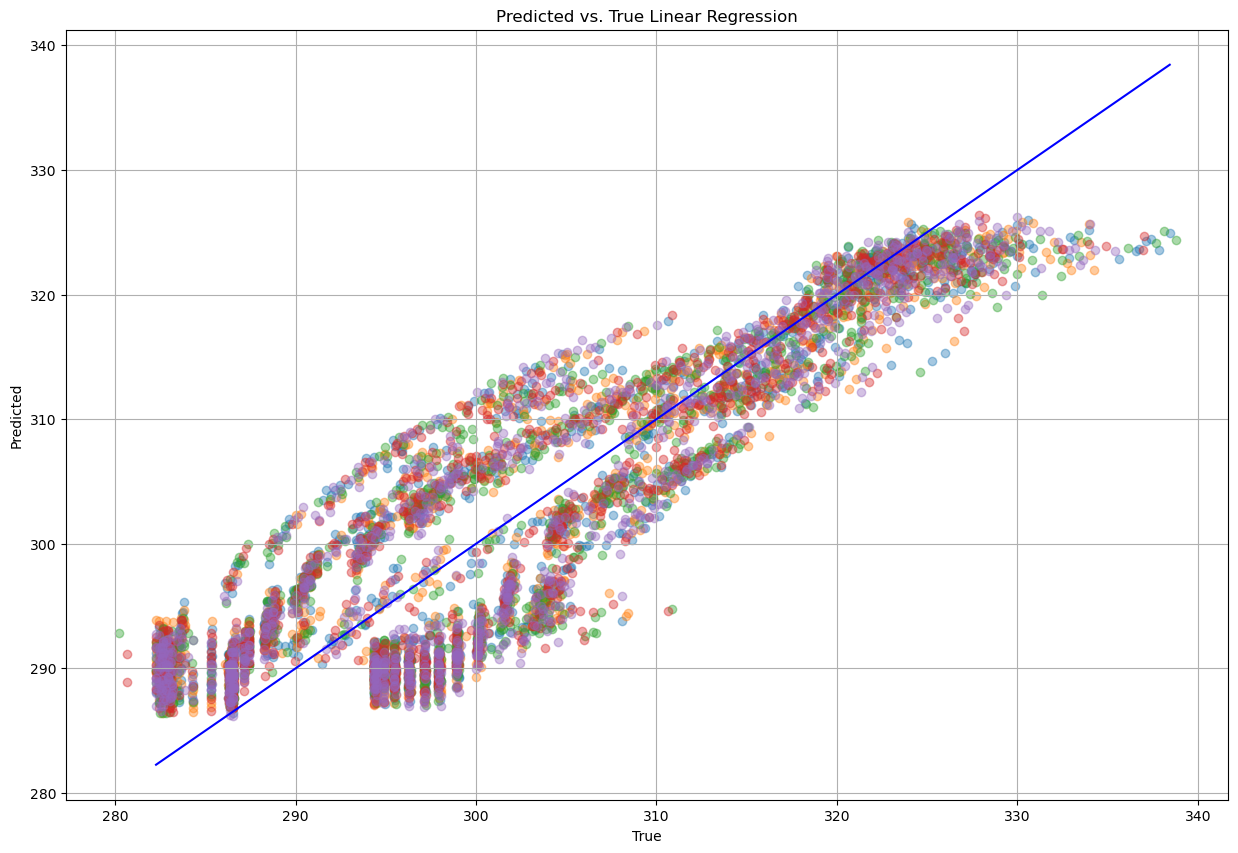

In [32]:
#plotting the predicitions vs the true values, each fold is a different color
plt.rcParams["figure.figsize"] = (15,10)
for i in range(5):
    plt.scatter(y_test_values[i], predictions[i],  alpha = 0.4)
    
plt.plot([min(y_test_values[0]), max(y_test_values[0])], [min(y_test_values[0]), max(y_test_values[0])], 'b-')
plt.xlabel('True')
plt.ylabel("Predicted")
plt.title("Predicted vs. True Linear Regression")
plt.grid(visible=True)

[Text(0, 0.5, 'residuals'), Text(0.5, 0, 'fitted values')]

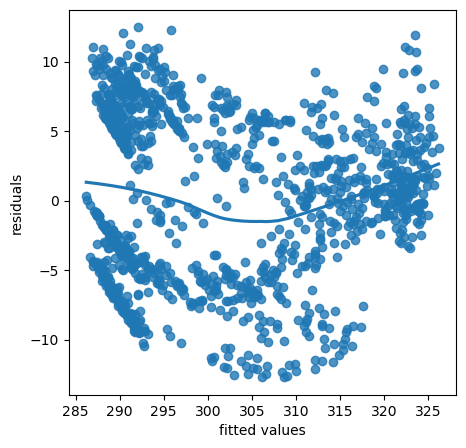

In [33]:
# sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize =(5,5))
sns.regplot(x=preds,y=Y_test-preds,ax=ax,lowess=True)
ax.set(ylabel='residuals',xlabel='fitted values')

##### Support Vector Regression
see above for description and documentation links

In [363]:
# Grid search for hyperparameter tuning
# This will take a while to run, so idealy only want to run this block once upon notebook start up

params = {'kernel' : ('linear', 'poly', 'rbf'),'C' : [0.1,1,10,100], 'gamma' : [0.1,0.01,0.001,0.0001]},
modelsvr = SVR()
#verbose argument configures what is printed out during training, n_jobs tells it to use all possible workers/threads available
grids = GridSearchCV(modelsvr, params, cv = 5, verbose = 3, n_jobs=-1) 
grids.fit(time_x_train_scaled_no_time,time_y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid=({'C': [0.1, 1, 10, 100],
                          'gamma': [0.1, 0.01, 0.001, 0.0001],
                          'kernel': ('linear', 'poly', 'rbf')},),
             verbose=3)

[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.788 total time=   7.2s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.495 total time=   5.6s
[CV 3/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.771 total time=   7.4s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.525 total time=  11.0s
[CV 4/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.780 total time=   3.7s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.074 total time=   5.0s
[CV 3/5] END .C=0.1, gamma=0.0001, kernel=poly;, score=-0.069 total time=   4.9s
[CV 1/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.787 total time=   4.3s
[CV 5/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.789 total time=   3.2s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.878 total time=   4.5s
[CV 5/5] END .....C=1, gamma=0.01, kernel=poly;, score=-0.042 total time=   2.4s
[CV 3/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.773 total time=   2.3s
[CV 3/5] END ....C=1, gamma=

[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.501 total time=   7.4s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.785 total time=   5.3s
[CV 4/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.780 total time=   7.5s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.535 total time=  10.9s
[CV 5/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.788 total time=   3.7s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.038 total time=   5.0s
[CV 5/5] END .C=0.1, gamma=0.0001, kernel=poly;, score=-0.057 total time=   5.1s
[CV 3/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.773 total time=   4.1s
[CV 2/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.831 total time=   3.2s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.902 total time=   4.4s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.794 total time=   3.7s
[CV 4/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.782 total time=   2.4s
[CV 2/5] END ......C=1, gamm

In [364]:
#this prints the best hyperparameters for our model
print(grids.best_params_)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [76]:
#Lengthy, but gives full output of GridSearch, useful information
grids.cv_results_

{'mean_fit_time': array([ 9.77936654,  7.36472378,  4.08873978,  3.41927519,  3.56433468,
         4.1743866 ,  3.48893261,  3.60943146,  4.21432557,  3.4053988 ,
         3.59359837,  4.56315804,  4.20090923,  3.89669046,  4.16449223,
         3.74312239,  3.67367229,  4.38271303,  3.81680255,  3.59063678,
         4.15956354,  3.73592196,  3.56492906,  4.13480854,  6.22164955,
         4.17022266,  4.86451941,  6.90610905,  4.23675499,  6.36535649,
         6.81554179,  3.71250119,  4.24306617,  6.68603973,  4.01350312,
         6.09342012, 21.91725283,  9.39884024, 10.67002311, 21.43290892,
         3.57826586,  4.6476037 , 22.30069547,  4.010356  ,  4.29410462,
        21.3953176 ,  3.63590598,  4.23753376]),
 'std_fit_time': array([0.03259953, 3.1254729 , 0.0184139 , 0.02690285, 0.01517678,
        0.0556527 , 0.0113    , 0.04441272, 0.0407341 , 0.0273848 ,
        0.02072942, 0.20978489, 0.10266002, 0.05233754, 0.09626945,
        0.09479649, 0.01763484, 0.06869212, 0.14572939, 0

In [34]:
#5 fold cross validation with best parameters determined by Grid Search
kf = KFold(n_splits=5)
mses = []
scores = []
predictions = []
y_test_values = []
nrmses = []
for train_index, test_index in kf.split(time_x_train_scaled_no_time):
    X_train = time_x_train_scaled_no_time.iloc[train_index]
    Y_train = time_y_train.iloc[train_index]
    X_test = time_x_train_scaled_no_time.iloc[test_index]
    Y_test = time_y_train.iloc[test_index]
    model = SVR(kernel='rbf', C = 100, gamma = 0.1)
    m = model.fit(X_train, Y_train)
    preds = model.predict(X_test)
    y_test_values.append(Y_test)
    predictions.append(preds)
    mses.append(mean_squared_error(Y_test, preds))
    nrmses.append(np.sqrt((mean_squared_error(Y_test, preds))/mean(Y_test)))
    scores.append(model.score(X_test,Y_test))
    
print("MSE:",mean(mses))
print("NRMSE:", mean(nrmses))
print("R^2:",mean(scores))

MSE: 3.0318004619197816
NRMSE: 0.10009706224004832
R^2: 0.9830617346424981


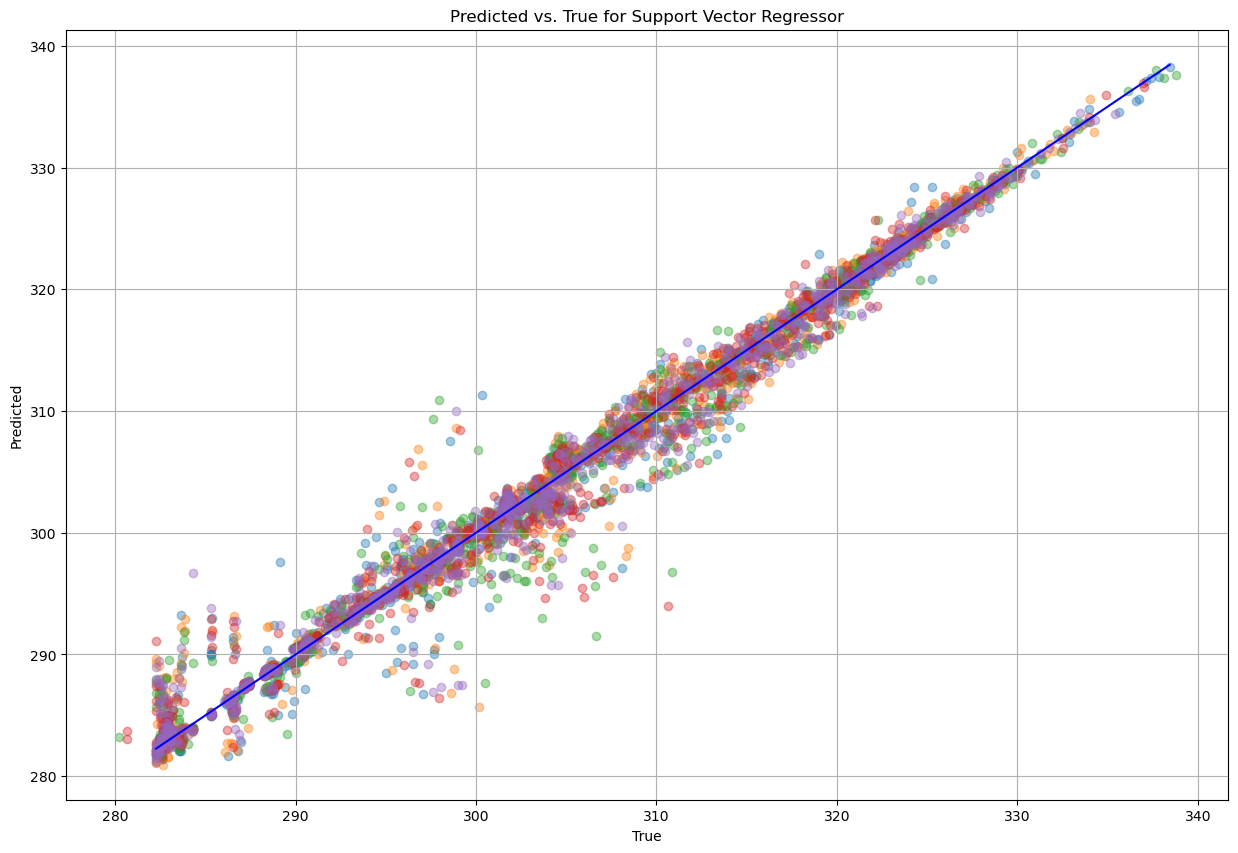

In [35]:
#plotting the predicitions vs the true values
plt.rcParams["figure.figsize"] = (15,10)
for i in range(5):
    plt.scatter(y_test_values[i], predictions[i],  alpha = 0.4)
    
plt.plot([min(y_test_values[0]), max(y_test_values[0])], [min(y_test_values[0]), max(y_test_values[0])], 'b-')
plt.xlabel('True')
plt.ylabel("Predicted")
plt.title("Predicted vs. True for Support Vector Regressor")
plt.grid(visible=True)

In [36]:
#making final svr model, training on full train set
svrmodel = SVR(kernel='rbf', C = 100, gamma = 0.1)
svrmodel.fit(time_x_train_scaled_no_time,time_y_train)

SVR(C=100, gamma=0.1)

##### Random Forest Regressor
see above for description and documentation links

In this part, in addition to tuning the max depth of the trees, I will also do grid search on additional parameters in an effort to increase performance. Many of these parameters mean the same as the parameters for gradient boosted trees since they're both ensemble tree methods. The documentation has the specifics on what each of them means.

In [488]:
#parameter grid - again takes a while to run since it's fitting so many models
params = {'max_depth': [6,8,10,12,14,16],'max_features': [2, 3, 4, 5, 6],'min_samples_split': [2, 4, 8, 10, 12],'n_estimators': [100, 200, 300, 1000]}
rfr = RandomForestRegressor()
grids = GridSearchCV(estimator = rfr, param_grid = params, cv = 5, n_jobs = -1, verbose = 1)
grids.fit(time_x_train_scaled_no_time,time_y_train)


Fitting 5 folds for each of 600 candidates, totalling 3000 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12, 14, 16],
                         'max_features': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 4, 8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=1)

In [489]:
#this prints the best hyperparameters for our model
print(grids.best_params_)

{'max_depth': 16, 'max_features': 5, 'min_samples_split': 2, 'n_estimators': 1000}


In [37]:
#Now using 5 fold CV with our best hyperparameters to evaluate the overall performance of the model 
kf = KFold(n_splits=5)
mses = []
scores = []
predictions = []
y_test_values = []
nrmses = []
for train_index, test_index in kf.split(time_x_train_scaled_no_time):
    X_train = time_x_train_scaled_no_time.iloc[train_index]
    Y_train = time_y_train.iloc[train_index]
    X_test = time_x_train_scaled_no_time.iloc[test_index]
    Y_test = time_y_train.iloc[test_index]
    model = RandomForestRegressor(max_depth = 16, max_features = 5, min_samples_split = 2, n_estimators = 1000)
    m = model.fit(X_train, Y_train)
    preds = model.predict(X_test)
    y_test_values.append(Y_test)
    predictions.append(preds)
    mses.append(mean_squared_error(Y_test, preds))
    nrmses.append(np.sqrt((mean_squared_error(Y_test, preds))/mean(Y_test)))
    scores.append(model.score(X_test,Y_test))
    
print("MSE:",mean(mses))
print("NRMSE:",mean(nrmses))
print("R^2:",mean(scores))

MSE: 0.15625755886310475
NRMSE: 0.022714681747679016
R^2: 0.9991261936605047


Text(0.5, 0, 'Gini Importance')

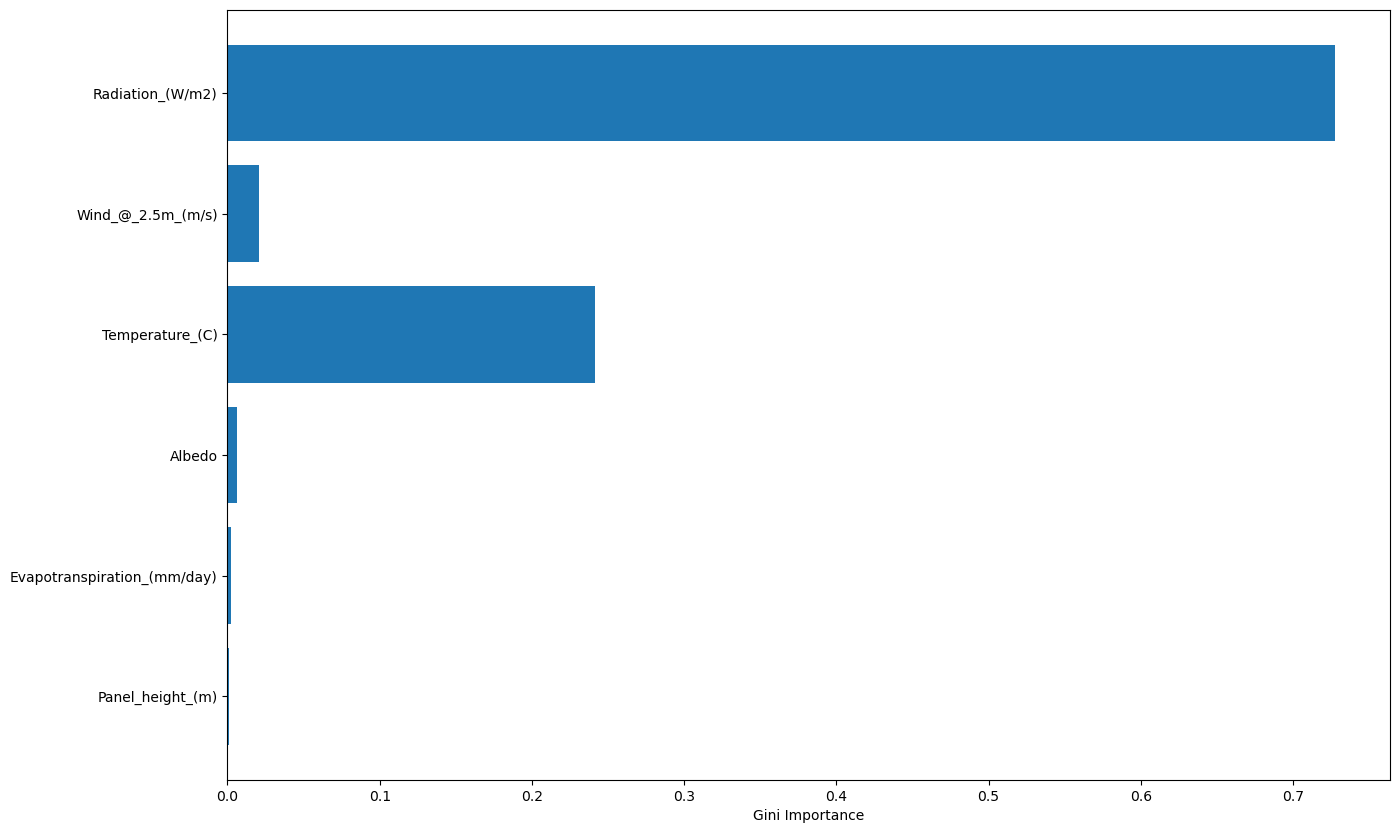

In [38]:
#taking a look at the feature importances
m = RandomForestRegressor(max_depth = 16, max_features = 5, min_samples_split = 2, n_estimators = 1000)
m.fit(time_x_train_scaled_no_time,time_y_train)
plt.barh(list(time_x_train_scaled_no_time.columns), m.feature_importances_)
plt.xlabel("Gini Importance")

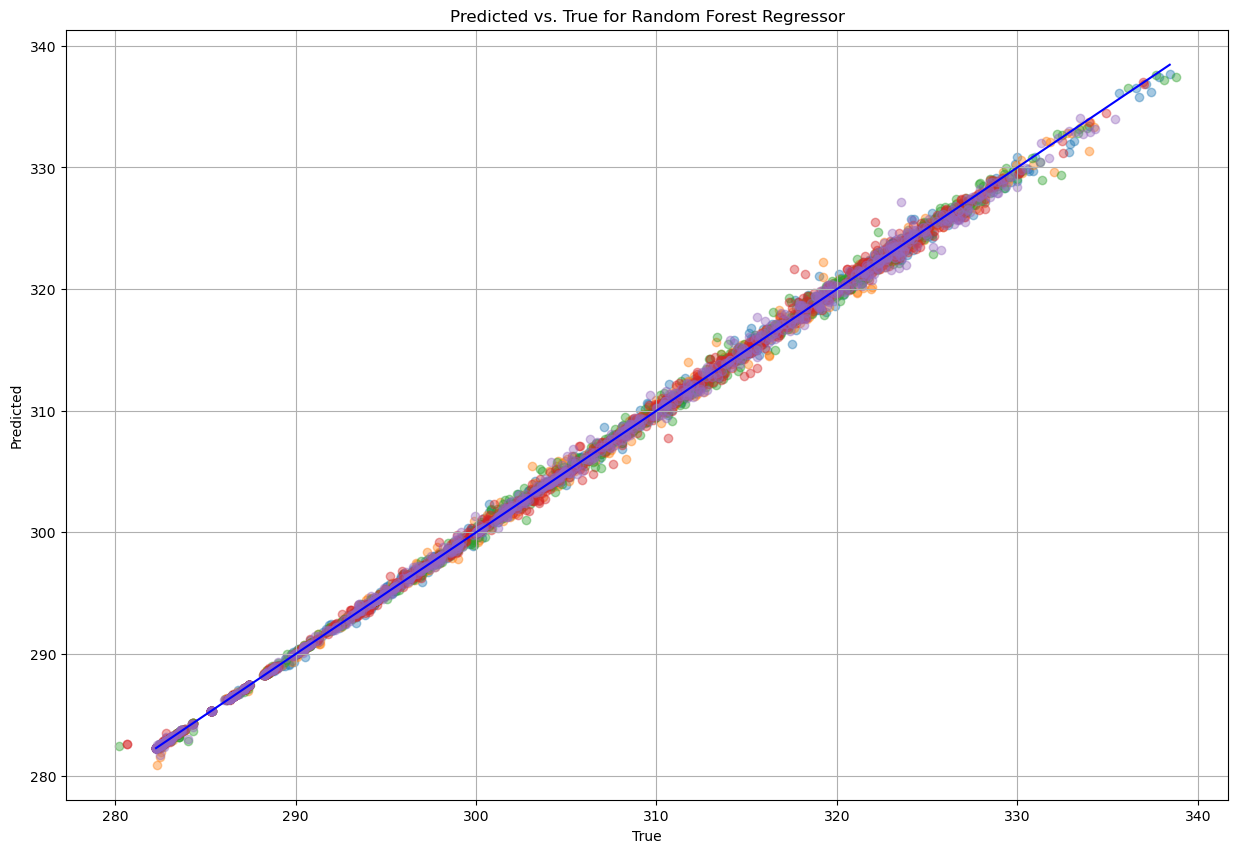

In [39]:
#plotting the predicitions vs the true values
plt.rcParams["figure.figsize"] = (15,10)
for i in range(5):
    plt.scatter(y_test_values[i], predictions[i],  alpha = 0.4)
    
plt.plot([min(y_test_values[0]), max(y_test_values[0])], [min(y_test_values[0]), max(y_test_values[0])], 'b-')
plt.xlabel('True')
plt.ylabel("Predicted")
plt.title("Predicted vs. True for Random Forest Regressor")
plt.grid(visible = True)

In [40]:
#making final rfr model, training on full train data
rfrmodel = RandomForestRegressor(max_depth = 16, max_features = 5, min_samples_split = 2, n_estimators = 1000)
rfrmodel.fit(time_x_train_scaled_no_time,time_y_train)

RandomForestRegressor(max_depth=16, max_features=5, n_estimators=1000)

###### Gradient Boosted Trees
see above for description and documentation links

In [41]:
#Hyperparameter tuning, ranges chosen based on common values chosen in literature - takes roughly 40 minutes to run
#only want to rerun this when we make changes to the data since it takes so long
parameters = {
    "n_estimators":[250,500,1000],
    "max_depth":[3,5,7],
    "learning_rate":[0.01,0.05,0.1],
    "subsample": [0.5,0.75,1],
    "min_samples_split":[4,8,12,16,20]
}

modelgbr = GradientBoostingRegressor()
grids = GridSearchCV(modelgbr, parameters, scoring = 'neg_mean_squared_error', cv = 5, verbose = 2) #verbose argument configures what is printed out during training
grids.fit(time_x_train_scaled_no_time,time_y_train)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=4, n_estimators=250, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=4, n_estimators=250, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=4, n_estimators=250, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=4, n_estimators=250, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=4, n_estimators=250, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=4, n_estimators=250, subsample=0.75; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=4, n_estimators=250, subsample=0.75; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=4, n_estimators=250, subsample=0.75; total time=   0.5s
[CV] END lear

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=8, n_estimators=500, subsample=1; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=8, n_estimators=500, subsample=1; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=8, n_estimators=500, subsample=1; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=8, n_estimators=500, subsample=1; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=8, n_estimators=1000, subsample=0.5; total time=   1.9s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=8, n_estimators=1000, subsample=0.5; total time=   1.7s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=8, n_estimators=1000, subsample=0.5; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=8, n_estimators=1000, subsample=0.5; total time=   1.9s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=8, n_estimators=1000, su

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=16, n_estimators=250, subsample=0.75; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=16, n_estimators=250, subsample=0.75; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=16, n_estimators=250, subsample=0.75; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=16, n_estimators=250, subsample=1; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=16, n_estimators=250, subsample=1; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=16, n_estimators=250, subsample=1; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=16, n_estimators=250, subsample=1; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=16, n_estimators=250, subsample=1; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=16, n_estimators=50

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=20, n_estimators=1000, subsample=0.5; total time=   1.7s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=20, n_estimators=1000, subsample=0.5; total time=   1.7s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=20, n_estimators=1000, subsample=0.75; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=20, n_estimators=1000, subsample=0.75; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=20, n_estimators=1000, subsample=0.75; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=20, n_estimators=1000, subsample=0.75; total time=   2.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=20, n_estimators=1000, subsample=0.75; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=20, n_estimators=1000, subsample=1; total time=   2.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=8, n_estimators=500, subsample=0.5; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=8, n_estimators=500, subsample=0.5; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=8, n_estimators=500, subsample=0.5; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=8, n_estimators=500, subsample=0.5; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=8, n_estimators=500, subsample=0.5; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=8, n_estimators=500, subsample=0.75; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=8, n_estimators=500, subsample=0.75; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=8, n_estimators=500, subsample=0.75; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=8, n_estimators=5

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=12, n_estimators=1000, subsample=1; total time=   3.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=12, n_estimators=1000, subsample=1; total time=   3.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=12, n_estimators=1000, subsample=1; total time=   3.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=12, n_estimators=1000, subsample=1; total time=   3.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=16, n_estimators=250, subsample=0.5; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=16, n_estimators=250, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=16, n_estimators=250, subsample=0.5; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=16, n_estimators=250, subsample=0.5; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=16, n_estimators

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=20, n_estimators=500, subsample=0.75; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=20, n_estimators=500, subsample=0.75; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=20, n_estimators=500, subsample=0.75; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=20, n_estimators=500, subsample=1; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=20, n_estimators=500, subsample=1; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=20, n_estimators=500, subsample=1; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=20, n_estimators=500, subsample=1; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=20, n_estimators=500, subsample=1; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=20, n_estimators=10

[CV] END learning_rate=0.01, max_depth=7, min_samples_split=8, n_estimators=250, subsample=0.5; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=7, min_samples_split=8, n_estimators=250, subsample=0.75; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=7, min_samples_split=8, n_estimators=250, subsample=0.75; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=7, min_samples_split=8, n_estimators=250, subsample=0.75; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=7, min_samples_split=8, n_estimators=250, subsample=0.75; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=7, min_samples_split=8, n_estimators=250, subsample=0.75; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=7, min_samples_split=8, n_estimators=250, subsample=1; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=7, min_samples_split=8, n_estimators=250, subsample=1; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=7, min_samples_split=8, n_estimators=250

[CV] END learning_rate=0.01, max_depth=7, min_samples_split=12, n_estimators=1000, subsample=0.5; total time=   2.9s
[CV] END learning_rate=0.01, max_depth=7, min_samples_split=12, n_estimators=1000, subsample=0.5; total time=   2.9s
[CV] END learning_rate=0.01, max_depth=7, min_samples_split=12, n_estimators=1000, subsample=0.5; total time=   2.9s
[CV] END learning_rate=0.01, max_depth=7, min_samples_split=12, n_estimators=1000, subsample=0.5; total time=   2.9s
[CV] END learning_rate=0.01, max_depth=7, min_samples_split=12, n_estimators=1000, subsample=0.75; total time=   3.6s
[CV] END learning_rate=0.01, max_depth=7, min_samples_split=12, n_estimators=1000, subsample=0.75; total time=   3.6s
[CV] END learning_rate=0.01, max_depth=7, min_samples_split=12, n_estimators=1000, subsample=0.75; total time=   3.6s
[CV] END learning_rate=0.01, max_depth=7, min_samples_split=12, n_estimators=1000, subsample=0.75; total time=   3.6s
[CV] END learning_rate=0.01, max_depth=7, min_samples_split=

[CV] END learning_rate=0.01, max_depth=7, min_samples_split=20, n_estimators=250, subsample=1; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=7, min_samples_split=20, n_estimators=250, subsample=1; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=7, min_samples_split=20, n_estimators=250, subsample=1; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=7, min_samples_split=20, n_estimators=500, subsample=0.5; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=7, min_samples_split=20, n_estimators=500, subsample=0.5; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=7, min_samples_split=20, n_estimators=500, subsample=0.5; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=7, min_samples_split=20, n_estimators=500, subsample=0.5; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=7, min_samples_split=20, n_estimators=500, subsample=0.5; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=7, min_samples_split=20, n_estimators=5

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=4, n_estimators=1000, subsample=0.75; total time=   2.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=4, n_estimators=1000, subsample=0.75; total time=   2.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=4, n_estimators=1000, subsample=1; total time=   2.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=4, n_estimators=1000, subsample=1; total time=   2.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=4, n_estimators=1000, subsample=1; total time=   2.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=4, n_estimators=1000, subsample=1; total time=   2.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=4, n_estimators=1000, subsample=1; total time=   2.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=8, n_estimators=250, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=8, n_estimators=250, 

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=12, n_estimators=500, subsample=0.75; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=12, n_estimators=500, subsample=0.75; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=12, n_estimators=500, subsample=0.75; total time=   1.3s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=12, n_estimators=500, subsample=0.75; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=12, n_estimators=500, subsample=0.75; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=12, n_estimators=500, subsample=1; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=12, n_estimators=500, subsample=1; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=12, n_estimators=500, subsample=1; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=12, n_estimat

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=20, n_estimators=250, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=20, n_estimators=250, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=20, n_estimators=250, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=20, n_estimators=250, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=20, n_estimators=250, subsample=0.75; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=20, n_estimators=250, subsample=0.75; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=20, n_estimators=250, subsample=0.75; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=20, n_estimators=250, subsample=0.75; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=20, n_es

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=4, n_estimators=500, subsample=1; total time=   1.5s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=4, n_estimators=500, subsample=1; total time=   1.5s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=4, n_estimators=500, subsample=1; total time=   1.6s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=4, n_estimators=1000, subsample=0.5; total time=   2.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=4, n_estimators=1000, subsample=0.5; total time=   2.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=4, n_estimators=1000, subsample=0.5; total time=   2.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=4, n_estimators=1000, subsample=0.5; total time=   2.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=4, n_estimators=1000, subsample=0.5; total time=   2.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=4, n_estimators=1000,

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=12, n_estimators=250, subsample=0.75; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=12, n_estimators=250, subsample=1; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=12, n_estimators=250, subsample=1; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=12, n_estimators=250, subsample=1; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=12, n_estimators=250, subsample=1; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=12, n_estimators=250, subsample=1; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=12, n_estimators=500, subsample=0.5; total time=   1.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=12, n_estimators=500, subsample=0.5; total time=   1.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=12, n_estimators=500,

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=16, n_estimators=1000, subsample=0.75; total time=   3.9s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=16, n_estimators=1000, subsample=0.75; total time=   3.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=16, n_estimators=1000, subsample=0.75; total time=   3.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=16, n_estimators=1000, subsample=0.75; total time=   3.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=16, n_estimators=1000, subsample=0.75; total time=   3.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=16, n_estimators=1000, subsample=1; total time=   3.5s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=16, n_estimators=1000, subsample=1; total time=   3.6s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=16, n_estimators=1000, subsample=1; total time=   3.5s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=16, n

[CV] END learning_rate=0.05, max_depth=7, min_samples_split=4, n_estimators=500, subsample=0.5; total time=   1.7s
[CV] END learning_rate=0.05, max_depth=7, min_samples_split=4, n_estimators=500, subsample=0.5; total time=   1.7s
[CV] END learning_rate=0.05, max_depth=7, min_samples_split=4, n_estimators=500, subsample=0.5; total time=   1.8s
[CV] END learning_rate=0.05, max_depth=7, min_samples_split=4, n_estimators=500, subsample=0.5; total time=   1.6s
[CV] END learning_rate=0.05, max_depth=7, min_samples_split=4, n_estimators=500, subsample=0.75; total time=   2.1s
[CV] END learning_rate=0.05, max_depth=7, min_samples_split=4, n_estimators=500, subsample=0.75; total time=   2.0s
[CV] END learning_rate=0.05, max_depth=7, min_samples_split=4, n_estimators=500, subsample=0.75; total time=   2.0s
[CV] END learning_rate=0.05, max_depth=7, min_samples_split=4, n_estimators=500, subsample=0.75; total time=   2.0s
[CV] END learning_rate=0.05, max_depth=7, min_samples_split=4, n_estimators=

[CV] END learning_rate=0.05, max_depth=7, min_samples_split=8, n_estimators=1000, subsample=1; total time=   4.8s
[CV] END learning_rate=0.05, max_depth=7, min_samples_split=8, n_estimators=1000, subsample=1; total time=   4.7s
[CV] END learning_rate=0.05, max_depth=7, min_samples_split=12, n_estimators=250, subsample=0.5; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=7, min_samples_split=12, n_estimators=250, subsample=0.5; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=7, min_samples_split=12, n_estimators=250, subsample=0.5; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=7, min_samples_split=12, n_estimators=250, subsample=0.5; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=7, min_samples_split=12, n_estimators=250, subsample=0.5; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=7, min_samples_split=12, n_estimators=250, subsample=0.75; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=7, min_samples_split=12, n_estimator

[CV] END learning_rate=0.05, max_depth=7, min_samples_split=16, n_estimators=500, subsample=0.75; total time=   1.8s
[CV] END learning_rate=0.05, max_depth=7, min_samples_split=16, n_estimators=500, subsample=1; total time=   2.1s
[CV] END learning_rate=0.05, max_depth=7, min_samples_split=16, n_estimators=500, subsample=1; total time=   2.1s
[CV] END learning_rate=0.05, max_depth=7, min_samples_split=16, n_estimators=500, subsample=1; total time=   2.1s
[CV] END learning_rate=0.05, max_depth=7, min_samples_split=16, n_estimators=500, subsample=1; total time=   2.1s
[CV] END learning_rate=0.05, max_depth=7, min_samples_split=16, n_estimators=500, subsample=1; total time=   2.1s
[CV] END learning_rate=0.05, max_depth=7, min_samples_split=16, n_estimators=1000, subsample=0.5; total time=   2.9s
[CV] END learning_rate=0.05, max_depth=7, min_samples_split=16, n_estimators=1000, subsample=0.5; total time=   2.8s
[CV] END learning_rate=0.05, max_depth=7, min_samples_split=16, n_estimators=10

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=4, n_estimators=250, subsample=0.75; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=4, n_estimators=250, subsample=0.75; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=4, n_estimators=250, subsample=0.75; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=4, n_estimators=250, subsample=0.75; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=4, n_estimators=250, subsample=0.75; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=4, n_estimators=250, subsample=1; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=4, n_estimators=250, subsample=1; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=4, n_estimators=250, subsample=1; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=4, n_estimators=250, subsample

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=8, n_estimators=1000, subsample=0.5; total time=   1.6s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=8, n_estimators=1000, subsample=0.5; total time=   1.6s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=8, n_estimators=1000, subsample=0.5; total time=   1.6s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=8, n_estimators=1000, subsample=0.75; total time=   1.9s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=8, n_estimators=1000, subsample=0.75; total time=   1.9s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=8, n_estimators=1000, subsample=0.75; total time=   2.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=8, n_estimators=1000, subsample=0.75; total time=   2.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=8, n_estimators=1000, subsample=0.75; total time=   2.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=8, n_estimators=

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=16, n_estimators=250, subsample=1; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=16, n_estimators=500, subsample=0.5; total time=   0.9s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=16, n_estimators=500, subsample=0.5; total time=   1.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=16, n_estimators=500, subsample=0.5; total time=   1.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=16, n_estimators=500, subsample=0.5; total time=   1.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=16, n_estimators=500, subsample=0.5; total time=   1.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=16, n_estimators=500, subsample=0.75; total time=   1.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=16, n_estimators=500, subsample=0.75; total time=   1.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=16, n_estimators=500,

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=20, n_estimators=1000, subsample=1; total time=   2.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=20, n_estimators=1000, subsample=1; total time=   2.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=20, n_estimators=1000, subsample=1; total time=   2.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=20, n_estimators=1000, subsample=1; total time=   2.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=4, n_estimators=250, subsample=0.5; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=4, n_estimators=250, subsample=0.5; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=4, n_estimators=250, subsample=0.5; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=4, n_estimators=250, subsample=0.5; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=4, n_estimators=250, subsampl

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=8, n_estimators=500, subsample=0.75; total time=   1.7s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=8, n_estimators=500, subsample=0.75; total time=   1.6s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=8, n_estimators=500, subsample=1; total time=   1.7s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=8, n_estimators=500, subsample=1; total time=   1.7s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=8, n_estimators=500, subsample=1; total time=   1.7s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=8, n_estimators=500, subsample=1; total time=   1.7s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=8, n_estimators=500, subsample=1; total time=   1.7s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=8, n_estimators=1000, subsample=0.5; total time=   2.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=8, n_estimators=1000, subsample=0.5;

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=16, n_estimators=250, subsample=0.75; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=16, n_estimators=250, subsample=0.75; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=16, n_estimators=250, subsample=0.75; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=16, n_estimators=250, subsample=0.75; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=16, n_estimators=250, subsample=0.75; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=16, n_estimators=250, subsample=1; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=16, n_estimators=250, subsample=1; total time=   0.9s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=16, n_estimators=250, subsample=1; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=16, n_estimators=250, 

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=20, n_estimators=1000, subsample=0.5; total time=   2.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=20, n_estimators=1000, subsample=0.5; total time=   2.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=20, n_estimators=1000, subsample=0.5; total time=   2.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=20, n_estimators=1000, subsample=0.75; total time=   3.9s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=20, n_estimators=1000, subsample=0.75; total time=   3.6s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=20, n_estimators=1000, subsample=0.75; total time=   3.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=20, n_estimators=1000, subsample=0.75; total time=   3.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=20, n_estimators=1000, subsample=0.75; total time=   3.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=20, n_es

[CV] END learning_rate=0.1, max_depth=7, min_samples_split=8, n_estimators=250, subsample=1; total time=   1.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_split=8, n_estimators=500, subsample=0.5; total time=   1.5s
[CV] END learning_rate=0.1, max_depth=7, min_samples_split=8, n_estimators=500, subsample=0.5; total time=   1.4s
[CV] END learning_rate=0.1, max_depth=7, min_samples_split=8, n_estimators=500, subsample=0.5; total time=   1.5s
[CV] END learning_rate=0.1, max_depth=7, min_samples_split=8, n_estimators=500, subsample=0.5; total time=   1.4s
[CV] END learning_rate=0.1, max_depth=7, min_samples_split=8, n_estimators=500, subsample=0.5; total time=   1.4s
[CV] END learning_rate=0.1, max_depth=7, min_samples_split=8, n_estimators=500, subsample=0.75; total time=   1.8s
[CV] END learning_rate=0.1, max_depth=7, min_samples_split=8, n_estimators=500, subsample=0.75; total time=   1.8s
[CV] END learning_rate=0.1, max_depth=7, min_samples_split=8, n_estimators=500, subsampl

[CV] END learning_rate=0.1, max_depth=7, min_samples_split=12, n_estimators=1000, subsample=1; total time=   4.2s
[CV] END learning_rate=0.1, max_depth=7, min_samples_split=12, n_estimators=1000, subsample=1; total time=   4.2s
[CV] END learning_rate=0.1, max_depth=7, min_samples_split=12, n_estimators=1000, subsample=1; total time=   4.2s
[CV] END learning_rate=0.1, max_depth=7, min_samples_split=12, n_estimators=1000, subsample=1; total time=   4.2s
[CV] END learning_rate=0.1, max_depth=7, min_samples_split=16, n_estimators=250, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=7, min_samples_split=16, n_estimators=250, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=7, min_samples_split=16, n_estimators=250, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=7, min_samples_split=16, n_estimators=250, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=7, min_samples_split=16, n_estimators=250, sub

[CV] END learning_rate=0.1, max_depth=7, min_samples_split=20, n_estimators=500, subsample=0.75; total time=   1.8s
[CV] END learning_rate=0.1, max_depth=7, min_samples_split=20, n_estimators=500, subsample=0.75; total time=   1.8s
[CV] END learning_rate=0.1, max_depth=7, min_samples_split=20, n_estimators=500, subsample=1; total time=   2.1s
[CV] END learning_rate=0.1, max_depth=7, min_samples_split=20, n_estimators=500, subsample=1; total time=   2.1s
[CV] END learning_rate=0.1, max_depth=7, min_samples_split=20, n_estimators=500, subsample=1; total time=   2.2s
[CV] END learning_rate=0.1, max_depth=7, min_samples_split=20, n_estimators=500, subsample=1; total time=   2.1s
[CV] END learning_rate=0.1, max_depth=7, min_samples_split=20, n_estimators=500, subsample=1; total time=   2.1s
[CV] END learning_rate=0.1, max_depth=7, min_samples_split=20, n_estimators=1000, subsample=0.5; total time=   2.9s
[CV] END learning_rate=0.1, max_depth=7, min_samples_split=20, n_estimators=1000, subsa

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'min_samples_split': [4, 8, 12, 16, 20],
                         'n_estimators': [250, 500, 1000],
                         'subsample': [0.5, 0.75, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [42]:
#prints out best parameter values found
grids.best_params_

{'learning_rate': 0.05,
 'max_depth': 7,
 'min_samples_split': 12,
 'n_estimators': 1000,
 'subsample': 0.5}

In [43]:
#Using best hyperparameters
kf = KFold(n_splits=5)
mses=[]
scores = []
predictions = []
y_test_values = []
nrmses = []
for train_index, test_index in kf.split(time_x_train_scaled_no_time):
    X_train = time_x_train_scaled_no_time.iloc[train_index]
    Y_train = time_y_train.iloc[train_index]
    X_test = time_x_train_scaled_no_time.iloc[test_index]
    Y_test = time_y_train.iloc[test_index]
    model = GradientBoostingRegressor(learning_rate = 0.05, n_estimators=1000, max_depth = 7, subsample=0.5, min_samples_split=12)
    m = model.fit(X_train, Y_train)
    preds = model.predict(X_test)
    y_test_values.append(Y_test)
    predictions.append(preds)
    mses.append(mean_squared_error(Y_test, preds))
    nrmses.append(np.sqrt((mean_squared_error(Y_test, preds))/mean(Y_test)))
    scores.append(model.score(X_test,Y_test))
    
print("MSE:",mean(mses))
print("NRMSE:",mean(nrmses))
print("R^2:",mean(scores))

MSE: 0.043173969619798
NRMSE: 0.011944234774785952
R^2: 0.9997592053592219


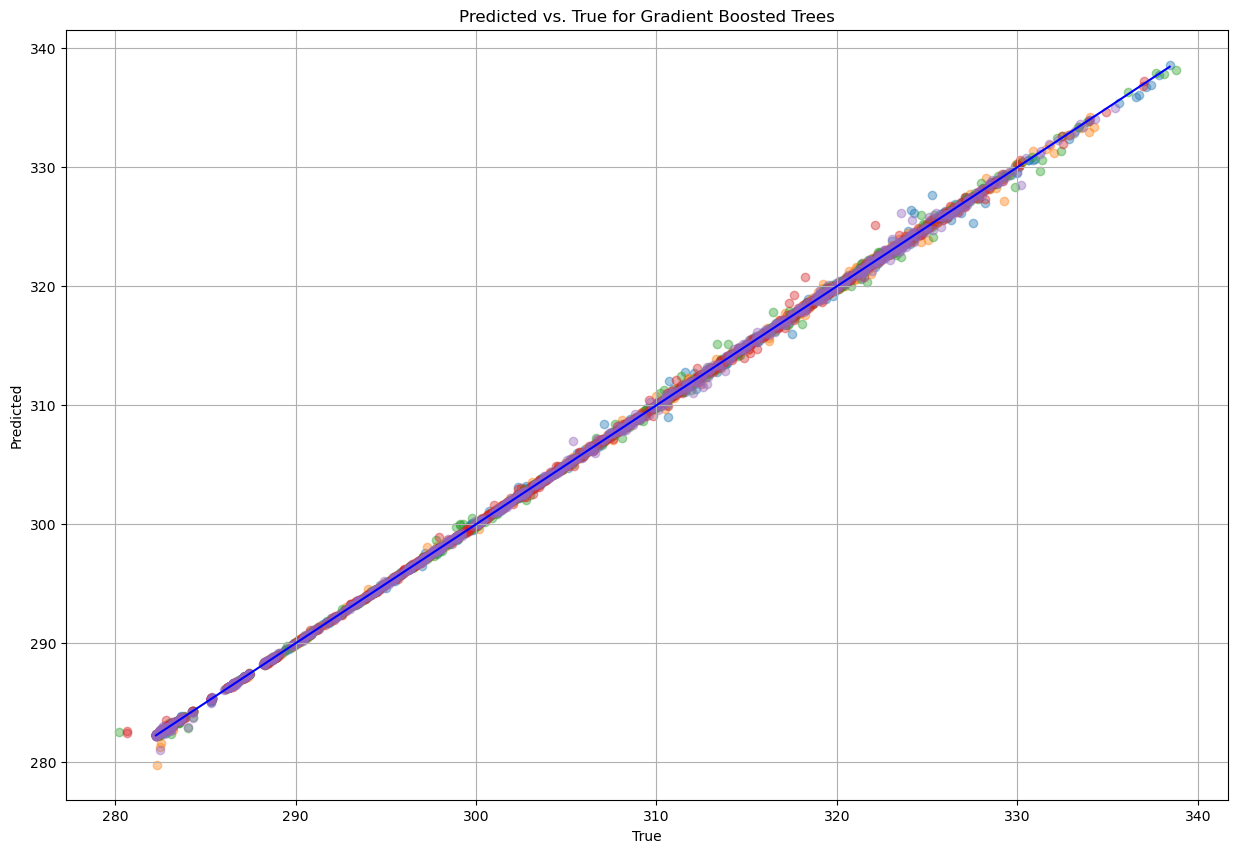

In [44]:
#plotting the predicitions vs the true values
for i in range(5):
    plt.scatter(y_test_values[i], predictions[i],  alpha = 0.4)
    
plt.plot([min(y_test_values[0]), max(y_test_values[0])], [min(y_test_values[0]), max(y_test_values[0])], 'b-')
plt.xlabel('True')
plt.ylabel("Predicted")
plt.title("Predicted vs. True for Gradient Boosted Trees")
plt.grid(visible=True)

In [172]:
#final gbt model
gbt_model = GradientBoostingRegressor(learning_rate = 0.05, n_estimators=1000, max_depth = 7, subsample=0.5, min_samples_split=12)
gbt_model.fit(time_x_train_scaled_no_time, time_y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=7, min_samples_split=12,
                          n_estimators=1000, subsample=0.5)

Based on these results, we can see that the latter 3 models perform similarly to before with the removal of the time feature. (linear regression seems to perform worse, but that's fine since it's already our worst model by a large margin)

###### Neural Network

Next I will explore using a neural network. I will use tensorflow (keras) to implement the neural network. I will implement a feed forward neural network with one hidden layer to start



In [92]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


2022-11-22 09:41:11.581765: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [239]:
def build_and_compile_model():
    model = keras.Sequential([
      layers.Dense(13, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(1)
    ])

    model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.Adam(0.0001))
    return model

In [240]:
dnn_model = build_and_compile_model()
# dnn_model.summary()

In [205]:
time_x_train2, time_x_validate, time_y_train2, time_y_validate = train_test_split(time_x_train_scaled_no_time, time_y_train, test_size=0.20, random_state=42) 

In [241]:
history = dnn_model.fit(
    time_x_train_scaled_no_time,
    time_y_train,
    validation_split=0.2,
    verbose=0, epochs=1000)

In [230]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.grid(True)

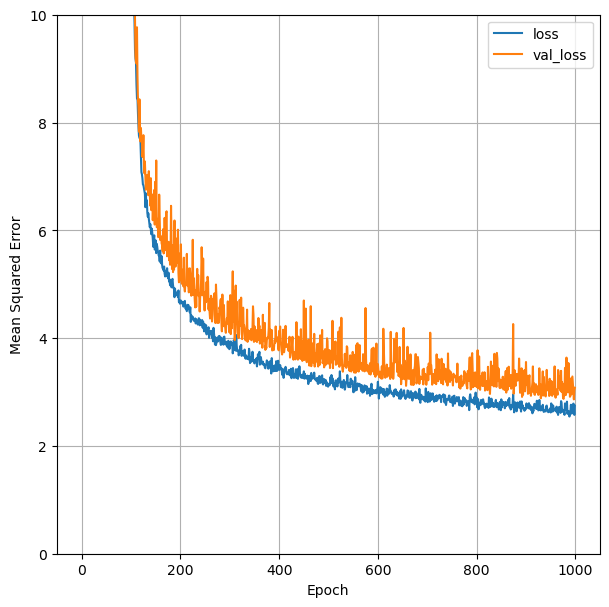

In [242]:
plot_loss(history)


In [243]:
test_results= dnn_model.evaluate(
    time_x_validate, time_y_validate,
    verbose=0)

In [244]:
test_results

2.521688938140869

Based on the results above, we get a higher MSE than we were getting with Random Forest, and Gradient Boosted Trees but it's still pretty good. This is most likely due to not having a great formulation of the NN to begin with. I will continue exploring different constructions (number of hidden layers/dimensions of layers) to attempt to improve this model.

Overall our Gradient Boosted Tree model with tuned hyperparameters performed really well (99.955 $R^2$ and 0.07470 MSE) so we already have a good model trained and tuned.

### Models - dropping rows that use percentages of weather data

looking back at the excel sheet i used to generate the CSV data, we can pick out the simulation numbers that this corresponds to and filter them out. 
Simulations 19-90, 109-144

In [48]:
df_time.shape

(7381, 20)

In [49]:
df_time_no_percentages = df_time[~df_time['simulationID'].between(19, 90)]
df_time_no_percentages = df_time_no_percentages[~df_time_no_percentages['simulationID'].between(109, 144)]
df_time_no_percentages.head() 

,simulationID,Time_(s),Panel_height_(m),Row_spacing_(m),Array_width_(m),Array_length_(m),Tilt_angle_(deg),Mounting_type,Orientation,Total_site_length_(m),Total_site_width_(m),Evapotranspiration_(mm/day),Albedo,Wind_(%_original_value),Radiation_(%_original_value),Temperature_(%_original_value),Temperature_(C),Wind_@_2.5m_(m/s),Radiation_(W/m2),Module_surface_temp
0,1,16200,0.5,4,73,1.8,25,Fixed tilt,South,188,73,0.8,100,100,100,100,13.16157,0.000010,0.000000,286.524925
1,1,18000,0.5,4,73,1.8,25,Fixed tilt,South,188,73,0.8,100,100,100,100,12.92596,0.000010,1.436712,286.336013
2,1,19800,0.5,4,73,1.8,25,Fixed tilt,South,188,73,0.8,100,100,100,100,13.21441,0.000010,16.879000,286.289191
3,1,21600,0.5,4,73,1.8,25,Fixed tilt,South,188,73,0.8,100,100,100,100,14.88530,0.114622,55.268990,287.164732
4,1,23400,0.5,4,73,1.8,25,Fixed tilt,South,188,73,0.8,100,100,100,100,16.18238,0.282775,104.182300,288.270785


In [50]:
df_time_no_percentages.shape

(3208, 20)

In [51]:
#train test split, and running our best model, GBT on the new data to get a sense of how it compares
df_time_x_no_percent = df_time_no_percentages[['Panel_height_(m)', 'Evapotranspiration_(mm/day)', 'Albedo', 'Temperature_(C)', 'Wind_@_2.5m_(m/s)', 'Radiation_(W/m2)']]
df_time_y_no_percent = df_time_no_percentages['Module_surface_temp']
time_x_train_no_percent, time_x_test_no_percent, time_y_train_no_percent, time_y_test_no_percent = train_test_split(df_time_x_no_percent, df_time_y_no_percent, test_size=0.20, random_state=42)

#scaling
sc_X = StandardScaler()
#Training data
time_x_train_scaled_no_percent = time_x_train_no_percent.copy()
time_x_train_scaled_no_percent[time_x_train_scaled_no_percent.columns] = sc_X.fit_transform(time_x_train_no_percent[time_x_train_no_percent.columns])
time_x_train_scaled_no_percent = time_x_train_scaled_no_percent.reset_index(drop=True)
#Testing data
time_x_test_scaled_no_percent = time_x_test_no_percent.copy()
time_x_test_scaled_no_percent[time_x_test_scaled_no_percent.columns] = sc_X.fit_transform(time_x_test_no_percent[time_x_test_no_percent.columns])
time_x_test_scaled_no_percent = time_x_test_scaled_no_percent.reset_index(drop=True)


In [52]:
kf = KFold(n_splits=5)
mses=[]
scores = []
predictions = []
y_test_values = []
nrmses = []
for train_index, test_index in kf.split(time_x_train_scaled_no_percent):
    X_train = time_x_train_scaled_no_percent.iloc[train_index]
    Y_train = time_y_train_no_percent.iloc[train_index]
    X_test = time_x_train_scaled_no_percent.iloc[test_index]
    Y_test = time_y_train_no_percent.iloc[test_index]
    model = GradientBoostingRegressor(learning_rate = 0.05, n_estimators=1000, max_depth = 5, subsample=0.5, min_samples_split=12)
    m = model.fit(X_train, Y_train)
    preds = model.predict(X_test)
    y_test_values.append(Y_test)
    predictions.append(preds)
    mses.append(mean_squared_error(Y_test, preds))
    nrmses.append(np.sqrt((mean_squared_error(Y_test, preds))/mean(Y_test)))
    scores.append(model.score(X_test,Y_test))
    
print("MSE:",mean(mses))
print("NRMSE:",mean(nrmses))
print("R^2:",mean(scores))

MSE: 0.04454150252516757
NRMSE: 0.01214917897183139
R^2: 0.9997081928090754


We can see that it performs similarly to when the data based on percentages of weather data is included (0.0119 NRMSE for previous model, vs. 0.0121 for the this model)

#### Learning Curves

plotting learning curves to explore how much data we need

In this case, our GBT model already performs very well with the data we have, so this analysis isn't exceptionally necessary. More data that is similar to what we already have might improve the model's performamce a little, but not a great deal. 

In [53]:
from sklearn.model_selection import learning_curve

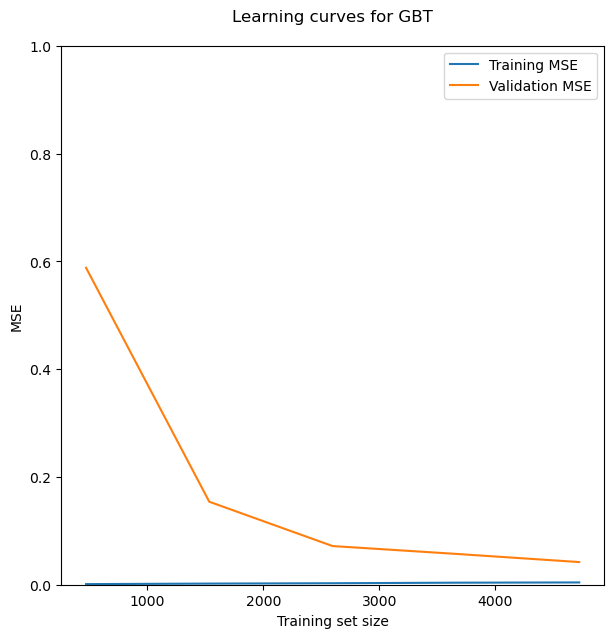

In [54]:
#Plotting learning curve for GBT
train_sizes, train_scores, validation_scores = learning_curve(GradientBoostingRegressor(learning_rate = 0.05, n_estimators=1000, max_depth = 7, subsample=0.5, min_samples_split = 12, criterion='squared_error'), X = time_x_train_scaled_no_time, y = time_y_train, cv=5, scoring="neg_mean_squared_error")

train_scores_mean = -train_scores.mean(axis =1)
val_scores_mean = -validation_scores.mean(axis = 1)

plt.rcParams["figure.figsize"] = (7,7)
plt.plot(train_sizes, train_scores_mean, label = 'Training MSE')
plt.plot(train_sizes, val_scores_mean, label = 'Validation MSE')
plt.ylabel('MSE')
plt.xlabel('Training set size')
plt.title('Learning curves for GBT', y = 1.03)
plt.legend()
plt.ylim(0,1)
plt.savefig('gbt_learning_curve.png')

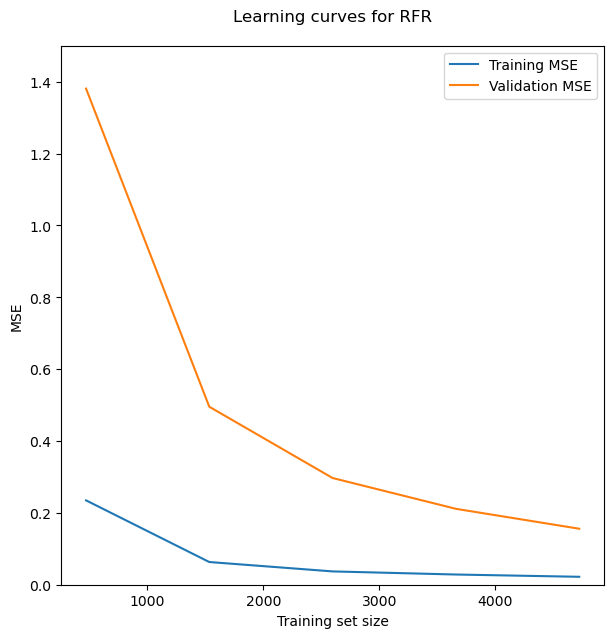

In [58]:
#Plotting learning curve for RFR
train_sizes, train_scores, validation_scores = learning_curve(RandomForestRegressor(max_depth=16, max_features = 5, min_samples_split =2, n_estimators = 1000), X = time_x_train_scaled_no_time, y = time_y_train, cv=5, scoring="neg_mean_squared_error")

train_scores_mean = -train_scores.mean(axis =1)
val_scores_mean = -validation_scores.mean(axis = 1)

plt.rcParams["figure.figsize"] = (7,7)
plt.plot(train_sizes, train_scores_mean, label = 'Training MSE')
plt.plot(train_sizes, val_scores_mean, label = 'Validation MSE')
plt.ylabel('MSE')
plt.xlabel('Training set size')
plt.title('Learning curves for RFR', y = 1.03)
plt.legend()
plt.ylim(0,1.5)
plt.savefig('rfr_learning_curve.png')

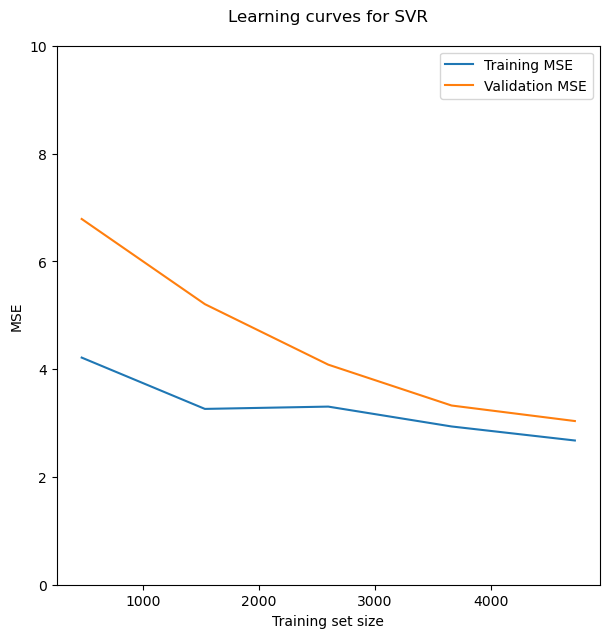

In [56]:

#Plotting learning curve for SVR
train_sizes, train_scores, validation_scores = learning_curve(SVR(kernel='rbf', C = 100, gamma = 0.1), X = time_x_train_scaled_no_time, y = time_y_train, cv=5, scoring="neg_mean_squared_error")

train_scores_mean = -train_scores.mean(axis =1)
val_scores_mean = -validation_scores.mean(axis = 1)

plt.rcParams["figure.figsize"] = (7,7)
plt.plot(train_sizes, train_scores_mean, label = 'Training MSE')
plt.plot(train_sizes, val_scores_mean, label = 'Validation MSE')
plt.ylabel('MSE')
plt.xlabel('Training set size')
plt.title('Learning curves for SVR', y = 1.03)
plt.legend()
plt.ylim(0,10)
plt.savefig('svr_learning_curve.png')

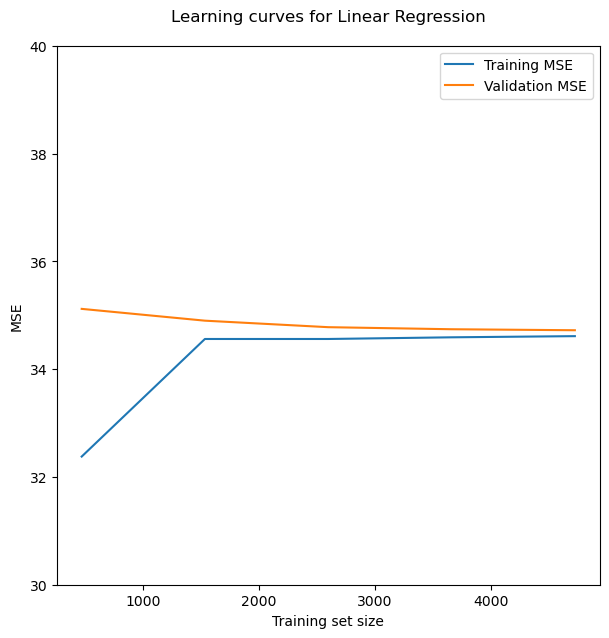

In [57]:
#Plotting learning curve for Linear regression
train_sizes, train_scores, validation_scores = learning_curve(LinearRegression(), X = time_x_train_scaled_no_time, y = time_y_train, cv=5, scoring="neg_mean_squared_error")

train_scores_mean = -train_scores.mean(axis =1)
val_scores_mean = -validation_scores.mean(axis = 1)

plt.rcParams["figure.figsize"] = (7,7)
plt.plot(train_sizes, train_scores_mean, label = 'Training MSE')
plt.plot(train_sizes, val_scores_mean, label = 'Validation MSE')
plt.ylabel('MSE')
plt.xlabel('Training set size')
plt.title('Learning curves for Linear Regression', y = 1.03)
plt.legend()
plt.ylim(30,40)
plt.savefig('lr_learning_curve.png')

# Running final model on test set

now that everything else is pretty much done, I will run the final models on the held out test set to see how it does. 

I will run all the models (except linear regression bc that one was bad), but we expect the GBT model to perform the best based on the validation error values we got above.

In [59]:
preds_test_svr = svrmodel.predict(time_x_test_scaled_no_time)
mse_test_svr = mean_squared_error(time_y_test, preds_test_svr)
nrmse_test_svr = np.sqrt((mean_squared_error(time_y_test, preds_test_svr))/mean(time_y_test))
score_test_svr = svrmodel.score(time_x_test_scaled_no_time,time_y_test)
print("Test MSE:", mse_test_svr)
print("Test NRMSE:", nrmse_test_svr)
print("Test R^2:", score_test_svr)

Test MSE: 4.484706303431472
Test NRMSE: 0.12190064325098088
Test R^2: 0.9753607137961484


In [60]:
preds_test_rfr = rfrmodel.predict(time_x_test_scaled_no_time)
mse_test_rfr = mean_squared_error(time_y_test, preds_test_rfr)
nrmse_test_rfr = np.sqrt((mean_squared_error(time_y_test, preds_test_rfr))/mean(time_y_test))
score_test_rfr = rfrmodel.score(time_x_test_scaled_no_time,time_y_test)
print("Test MSE:", mse_test_rfr)
print("Test NRMSE:", nrmse_test_rfr)
print("Test R^2:", score_test_rfr)

Test MSE: 3.8186016503380524
Test NRMSE: 0.11248410879340706
Test R^2: 0.9790203387701915


In [61]:
preds_test_gbt = gbt_model.predict(time_x_test_scaled_no_time)
mse_test_gbt = mean_squared_error(time_y_test, preds_test_gbt)
nrmse_test_gbt = np.sqrt((mean_squared_error(time_y_test, preds_test_gbt))/mean(time_y_test))
score_test_gbt = gbt_model.score(time_x_test_scaled_no_time,time_y_test)
print("Test MSE:", mse_test_gbt)
print("Test NRMSE:", nrmse_test_gbt)
print("Test R^2:", score_test_gbt)

Test MSE: 3.286148676821753
Test NRMSE: 0.10434763204318596
Test R^2: 0.981945672184895


We can see that the GBT model did in fact perform the best, all 3 models performed a little worse than the validation values we were getting previously, this could be due to natural error, or slight overfitting in the modeling process. As the amount of data we have increases (when more simulations are run), this will help decrease the minimal overfitting we are seeing. 

## Optimization

Now that we have models that are performing pretty well, we can explore optimization methods (given a desired output temp, what are the best inputs/settings). 

I tried to get the omlt package working, but the documentation wasn't sufficient and it seemed to be more geared towards NN, while our best model was the gradient boosted trees. Thus I found another library that has the same functionality, with a bit more complete documentation and more applicable to different models.

The library I'm using it the [Scipy Optimization library](https://docs.scipy.org/doc/scipy/reference/optimize.html). It provides functions for minimizing (or maximizing) objective functions, subject to constraints. More specifcially I will use [Dual Annealing](https://machinelearningmastery.com/dual-annealing-optimization-with-python/), which is a stochastic optimization method in which you can specify bounds for the input variables. 

I will used the gbt_model as our model since that one had the best performance. This can be changed by changing which model is used to predict in the objective function in the first big cell.

[Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.dual_annealing.html)

(using data without time as a feature)


In [80]:
#Necessary imports
import scipy.optimize as opt
#supressing warnings that show up during optimization
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=UserWarning)

In [87]:
df_time.describe()

,simulationID,Time_(s),Panel_height_(m),Row_spacing_(m),Array_width_(m),Array_length_(m),Tilt_angle_(deg),Total_site_length_(m),Total_site_width_(m),Evapotranspiration_(mm/day),Albedo,Wind_(%_original_value),Radiation_(%_original_value),Temperature_(%_original_value),Temperature_(C),Wind_@_2.5m_(m/s),Radiation_(W/m2),Module_surface_temp
count,7381.000000,7381.000000,7381.000000,7381.0,7381.0,7.381000e+03,7381.0,7381.0,7381.0,7381.000000,7381.000000,7381.000000,7381.000000,7381.0,7381.000000,7381.000000,7381.000000,7381.000000
mean,101.138328,49838.612654,2.699025,4.0,73.0,1.800000e+00,25.0,188.0,73.0,0.400054,50.237095,81.585828,95.244547,100.0,41.744957,2.442511,255.206534,301.759798
std,62.393187,20048.857922,1.679731,0.0,0.0,1.998537e-13,0.0,0.0,0.0,0.400027,40.561915,24.236059,14.669270,0.0,68.967003,1.567219,253.517677,13.418680
min,1.000000,16200.000000,0.500000,4.0,73.0,1.800000e+00,25.0,188.0,73.0,0.000000,0.000000,25.000000,50.000000,100.0,9.209025,0.000003,0.000000,280.195867
25%,48.000000,32400.000000,1.500000,4.0,73.0,1.800000e+00,25.0,188.0,73.0,0.000000,0.000000,75.000000,100.000000,100.0,16.182380,1.202012,1.436712,290.837518
50%,96.000000,50400.000000,2.500000,4.0,73.0,1.800000e+00,25.0,188.0,73.0,0.800000,50.000000,100.000000,100.000000,100.0,24.495240,2.520475,162.587300,298.943522
75%,144.000000,66600.000000,4.500000,4.0,73.0,1.800000e+00,25.0,188.0,73.0,0.800000,100.000000,100.000000,100.000000,100.0,28.903460,3.426576,472.999800,311.802945
max,222.000000,84600.000000,5.500000,4.0,73.0,1.800000e+00,25.0,188.0,73.0,0.800000,100.000000,100.000000,100.000000,100.0,283.485340,7.814701,713.501500,338.768755


In [88]:
#Defining the function that we want to minimize (i.e. we want to minimize the absolute difference between the 
#predicted value and our target output value)
def objective(v, target_value):
    v = v.reshape(1,-1)
    #can change which model we're using here (replace gbt_model with different model)
    return np.abs(gbt_model.predict(np.array([v])[0])-target_value)

#Inputs: Weather data - Temperature (deg celsius), Wind (@2.5m, m/2), and Radiation (W/m^2)
#        Desired module surface temperature
#Outputs: Optimal panel height (m), optimal Evapotranspiration(mm/day), and optimal Albedo
#         Full set of untransformed feature set (can feed this directly back into model to make a prediction if desired)
def opt_func(temp,wind,rad,desired_temp):
    #need to transform inputs to be on same scale that our data is
    scaled_inp = sc_X.transform([[0,0,0,0,temp,wind,rad]])
    temp,wind,rad = scaled_inp[0][4], scaled_inp[0][5], scaled_inp[0][6]
    
    #setting bounds for our optimization problem
    #right now the only 'settable' parameters are the panel height, evapotranspiration, and albedo
    #so those are the only ones that will change
    bounds = [[time_x_train_scaled_no_time['Panel_height_(m)'].min(),time_x_train_scaled_no_time['Panel_height_(m)'].max()], [time_x_train_scaled_no_time['Evapotranspiration_(mm/day)'].min(),time_x_train_scaled_no_time['Evapotranspiration_(mm/day)'].max()], [time_x_train_scaled_no_time['Albedo'].min(),time_x_train_scaled_no_time['Albedo'].max()], [temp-0.000001,temp], [wind-0.000001,wind],[rad-0.000001,rad]]
    
    #Running function, args value is our target output temperature value
    res = opt.dual_annealing(objective, bounds = bounds, args = [desired_temp], maxiter = 1000)
    panel = res.x[0]
    evap = res.x[1]
    alb = res.x[2]
    untransformed_full_feature_set = res.x
    
    #need to reverse transform to get back to interpretable units
    inv_transformed = sc_X.inverse_transform([[0,panel,evap,alb,0,0,0]])
    opt_panel_height = inv_transformed[0][1]
    opt_evap = inv_transformed[0][2]
    opt_alb = inv_transformed[0][3]
    return opt_panel_height, opt_evap, opt_alb, untransformed_full_feature_set
    

In [89]:
#Optimization example
optimal_panel_height, optimal_evap, optimal_albedo, untransformed_full_feature_set = opt_func(13,3,400,285)

In [90]:
optimal_evap

0.4747390394395591

In [91]:
optimal_albedo

80.19976587347911

In [92]:
optimal_panel_height

3.003369166931971

In [93]:
untransformed_full_feature_set

array([ 0.22029654,  0.24067891,  0.7491835 , -0.42121544,  0.3290817 ,
        0.5603827 ])

exploring writing some wrapper functions for specific use cases

In [95]:
#optimizes panel height for a specific crop that has optimal evap of 0.5 and albedo of 80 hardcoded in
#parameters: temp, wind, rad : weather data
#            desired_temp : desired module surface temperature
#output: optimal panel height, and full untransformed feature set
def opt_for_crop_a(temp,wind,rad,desired_temp):
    evap = 0.5
    alb = 80
    
    scaled_inp = sc_X.transform([[0,0,evap,alb,temp,wind,rad]])
    evap,alb,temp,wind,rad = scaled_inp[0][2],scaled_inp[0][3],scaled_inp[0][4], scaled_inp[0][5], scaled_inp[0][6]

    bounds = [[time_x_train_scaled_no_time['Panel_height_(m)'].min(),time_x_train_scaled_no_time['Panel_height_(m)'].max()], [evap-0.0000001, evap], [alb-0.000001, alb], [temp-0.000001,temp], [wind-0.000001,wind],[rad-0.000001,rad]]
    
    res = opt.dual_annealing(objective, bounds = bounds, args = [desired_temp], maxiter = 1000)
    panel = res.x[0]
    untransformed_full_feature_set = res.x
    
    inv_transformed = sc_X.inverse_transform([[0,panel,0,0,0,0,0]])
    opt_panel_height = inv_transformed[0][1]
    return opt_panel_height, untransformed_full_feature_set
    

In [96]:
#example of opt_for_crop_a
pan_height,full = opt_for_crop_a(25, 2, 130,303)
print("optimized panel height for crop a given the evap & alb:", pan_height)

[301.0030143]
optimized panel height for crop a given the evap & alb: 0.8593520423456298


given panel height, optimize other things

In [122]:
# given 3 different crops with different desired evap & alb, returns which one is best suited
#parameters: crops_evaps_albs : 2d array of evap and alb values for 3 different crops to explore
#            temp, wind, rad : weather data
#            desired_temp : desired module surface temperature
#output: optimal panel height, and full untransformed feature set for whichever crop achieved module surface temp closest to desired
def opt_for_3_crops(crops_evaps_albs, temp, wind, rad, desired_temp):
    crop1_evap,crop1_alb = crops_evaps_albs[0][0],crops_evaps_albs[0][1]
    crop2_evap,crop2_alb = crops_evaps_albs[1][0],crops_evaps_albs[1][1]
    crop3_evap,crop3_alb = crops_evaps_albs[2][0],crops_evaps_albs[2][1]
    
    scaled_inp1 = sc_X.transform([[0,0,crop1_evap,crop1_alb,temp,wind,rad]])
    evap1,alb1,temp1,wind1,rad1 = scaled_inp1[0][2],scaled_inp1[0][3],scaled_inp1[0][4], scaled_inp1[0][5], scaled_inp1[0][6]
    bounds1 = [[time_x_train_scaled_no_time['Panel_height_(m)'].min(),time_x_train_scaled_no_time['Panel_height_(m)'].max()], [evap1-0.0000001, evap1], [alb1-0.000001, alb1], [temp1-0.000001,temp1], [wind1-0.000001,wind1],[rad1-0.000001,rad1]]
    res1 = opt.dual_annealing(objective, bounds = bounds1, args = [desired_temp], maxiter = 1000)
    panel1 = res1.x[0]
    untransformed_full_feature_set1 = res1.x
    val1 = gbt_model.predict([[panel1,evap1,alb1,temp1,wind1,rad1]])
    func1 = np.abs(val1-desired_temp)
    
    scaled_inp2 = sc_X.transform([[0,0,crop2_evap,crop2_alb,temp,wind,rad]])
    evap2,alb2,temp2,wind2,rad2 = scaled_inp2[0][2],scaled_inp2[0][3],scaled_inp2[0][4], scaled_inp2[0][5], scaled_inp2[0][6]
    bounds2 = [[time_x_train_scaled_no_time['Panel_height_(m)'].min(),time_x_train_scaled_no_time['Panel_height_(m)'].max()], [evap2-0.0000001, evap2], [alb2-0.000001, alb2], [temp2-0.000001,temp2], [wind2-0.000001,wind2],[rad2-0.000001,rad2]]
    res2 = opt.dual_annealing(objective, bounds = bounds2, args = [desired_temp], maxiter = 1000)
    panel2 = res2.x[0]
    untransformed_full_feature_set2 = res2.x
    val2 = gbt_model.predict([[panel2,evap2,alb2,temp2,wind2,rad2]])
    func2 = np.abs(val2-desired_temp)

    scaled_inp3 = sc_X.transform([[0,0,crop3_evap,crop3_alb,temp,wind,rad]])
    evap3,alb3,temp3,wind3,rad3 = scaled_inp3[0][2],scaled_inp3[0][3],scaled_inp3[0][4], scaled_inp3[0][5], scaled_inp3[0][6]
    bounds3 = [[time_x_train_scaled_no_time['Panel_height_(m)'].min(),time_x_train_scaled_no_time['Panel_height_(m)'].max()], [evap3-0.0000001, evap3], [alb3-0.000001, alb3], [temp3-0.000001,temp3], [wind3-0.000001,wind3],[rad3-0.000001,rad3]]
    res3 = opt.dual_annealing(objective, bounds = bounds3, args = [desired_temp], maxiter = 1000)
    panel3 = res3.x[0]
    untransformed_full_feature_set3 = res3.x
    val3 = gbt_model.predict([[panel3,evap3,alb3,temp3,wind3,rad3]])
    func3 = np.abs(val3-desired_temp)

    #determining which crop resulted in temp closest to desired temp:
    if(min(func1,func2,func3)==func1):
        print("crop 1 resulted in value closest to desired temp")
        print(val1)
        inv_transformed = sc_X.inverse_transform([[0,panel1,0,0,0,0,0]])
        opt_panel_height = inv_transformed[0][1]
        return opt_panel_height, untransformed_full_feature_set1
    elif(min(func1,func2,func3)==func2):
        print("crop 2 resulted in value closest to desired temp")
        print(val2)
        inv_transformed = sc_X.inverse_transform([[0,panel2,0,0,0,0,0]])
        opt_panel_height = inv_transformed[0][1]
        return opt_panel_height, untransformed_full_feature_set2
    elif(min(func1,func2,func3)==func3):
        print("crop 3 resulted in value closest to desired temp")
        print(val3)
        inv_transformed = sc_X.inverse_transform([[0,panel3,0,0,0,0,0]])
        opt_panel_height = inv_transformed[0][1]
        return opt_panel_height, untransformed_full_feature_set3

    
    

In [123]:
#example of opt_for_3_crops
crops_evaps_albs = [[0.8,40], [0.3,90], [0.5,80]]
opt_panel, full = opt_for_3_crops(crops_evaps_albs,30,5,20,330)

crop 1 resulted in value closest to desired temp
[301.68467833]


In [124]:
#given possible ranges of evap and alb, return optimized parameters 
#parameters: evap_range : 1d array of min and max evap values for a certain crop
#            alb_range : 1d array of min and max albedo values for a certain crop
#            temp, wind, rad : weather data
#            desired_temp : desired module surface temperature
#output: optimal panel height, optimal evap (within given range), optimal albedo (within given range), and full untransformed feature set
def opt_evap_range_alb_range(evap_range, alb_range, temp, wind, rad, desired_temp):
    scaled_inp = sc_X.transform([[0,0,0,0,temp,wind,rad]])
    temp,wind,rad = scaled_inp[0][4], scaled_inp[0][5], scaled_inp[0][6]

    evap_min,evap_max = evap_range[0],evap_range[1]
    alb_min,alb_max = alb_range[0],alb_range[1]
    
    scaled_inp = sc_X.transform([[0,0,evap_min,alb_min,0,0,0]])
    evap_min,alb_min = scaled_inp[0][2], scaled_inp[0][3]
    scaled_inp = sc_X.transform([[0,0,evap_max,alb_max,0,0,0]])
    evap_max,alb_max = scaled_inp[0][2], scaled_inp[0][3]
    
    #setting bounds for our optimization problem
    #right now the only 'settable' parameter is the panel height
    bounds = [[time_x_train_scaled_no_time['Panel_height_(m)'].min(),time_x_train_scaled_no_time['Panel_height_(m)'].max()], [evap_min,evap_max], [alb_min,alb_max], [temp-0.000001,temp], [wind-0.000001,wind],[rad-0.000001,rad]]
    
    #Running function, args value is our target output temperature value
    res = opt.dual_annealing(objective, bounds = bounds, args = [desired_temp], maxiter = 1000)
    panel = res.x[0]
    evap = res.x[1]
    alb = res.x[2]
    untransformed_full_feature_set = res.x
    
    #need to reverse transform to get back to interpretable units
    inv_transformed = sc_X.inverse_transform([[0,panel,evap,alb,0,0,0]])
    opt_panel_height = inv_transformed[0][1]
    opt_evap = inv_transformed[0][2]
    opt_alb = inv_transformed[0][3]
    return opt_panel_height, opt_evap, opt_alb, untransformed_full_feature_set
    
    

In [125]:
#Opt with evap and alb ranges example
evap_range = [0.5,0.8]
alb_range = [75,100]
optimal_panel_height, optimal_evap, optimal_albedo, untransformed_full_feature_set = opt_evap_range_alb_range(evap_range, alb_range, 13,3,400,285)

print(optimal_panel_height)
print(optimal_evap)
print(optimal_albedo)

3.6668401699659547
0.6002158401694482
86.42417025143075


look at range of panel heights, plot panel height vs. optimal temperature to show tradeoff

In [170]:
#utility plotting funciton
def plot_panel_height_vs_temp(heights, temps):
    plt.rcParams["figure.figsize"] = (7,7)
    plt.plot(heights, temps)
    plt.ylabel('Temperature')
    plt.xlabel('Panel Height')
    plt.title('Panel Heights vs. Module surface temperature for given evap, alb, and weather data')
    plt.savefig('temp_vs_panel_height.png')
    
# Parameters: heights : panel heights to explore
#             evap, alb : crop's evapotranspiration and albedo values
#             temp, wind, rad : weather data
#             desired_temp : desired surface temp
#             plot_bool : boolean indicating whether a plot should be generated or not
# Outputs: list of module surface temps acheived at each panel height in heights
#          prints out all other information and plot (if indicated)
def panel_height_range(heights, evap, alb, temp, wind, rad, desired_temp, plot_bool = True):
    
    scaled_inp = sc_X.transform([[0,0,evap,alb,temp,wind,rad]])
    evap,alb,temp,wind,rad = scaled_inp[0][2], scaled_inp[0][3], scaled_inp[0][4], scaled_inp[0][5], scaled_inp[0][6]
    #setting bounds for our optimization problem
    #right now the only 'settable' parameter is the panel height
    bounds = [[time_x_train_scaled_no_time['Panel_height_(m)'].min(),time_x_train_scaled_no_time['Panel_height_(m)'].max()], [evap-0.000001,evap], [alb-0.000001,alb], [temp-0.000001,temp], [wind-0.000001,wind],[rad-0.000001,rad]]
    
    #Running function, args value is our target output temperature value
    res = opt.dual_annealing(objective, bounds = bounds, args = [desired_temp], maxiter = 1000)
    panel = res.x[0]
    untransformed_full_feature_set = res.x
    inv_transformed = sc_X.inverse_transform([[0,panel,0,0,0,0,0]])
    opt_panel_height = inv_transformed[0][1]
    val = gbt_model.predict([[panel,evap,alb,temp,wind,rad]])
    print("the optimal panel height given the parameters is: ", opt_panel_height)
    print("this gives a temperature of ", val)
    
    temps = []
    for h in heights:
        scaled_height = sc_X.transform([[0,h,0,0,0,0,0]])[0][1]
        predicted_temp = gbt_model.predict([[scaled_height,evap,alb,temp,wind,rad]])
        print("current height: ", h)
        print("predicted temp: ", predicted_temp)
        temps.append(predicted_temp)
    
    if plot_bool:
        plot_panel_height_vs_temp(heights, temps)
        
    return temps
    

the optimal panel height given the parameters is:  5.093271856341327
this gives a temperature of  [311.19047279]
current height:  1
predicted temp:  [311.69997379]
current height:  2
predicted temp:  [311.75426104]
current height:  3
predicted temp:  [311.32394815]
current height:  4
predicted temp:  [311.44669735]
current height:  5
predicted temp:  [311.19047279]


[array([311.69997379]),
 array([311.75426104]),
 array([311.32394815]),
 array([311.44669735]),
 array([311.19047279])]

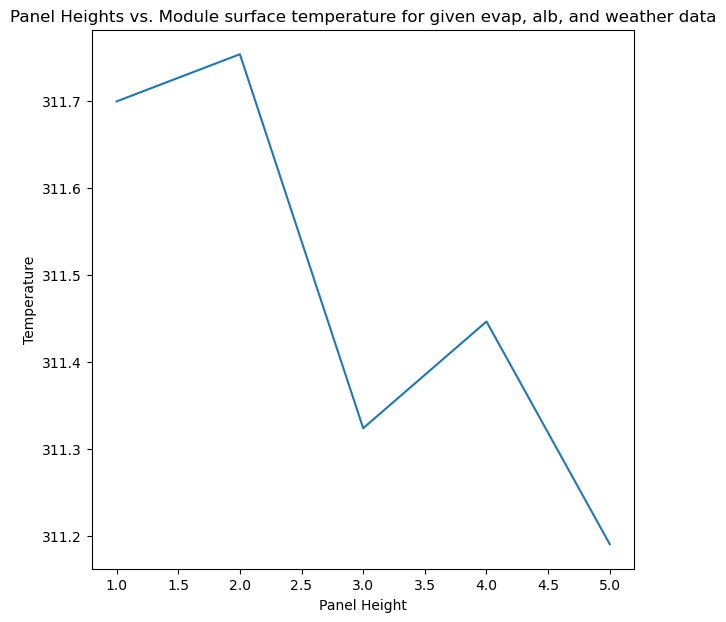

In [174]:
# hs = [0.5,1,1.5,2.5,3.5,4.5,5.5]
hs = [1,2,3,4,5]
panel_height_range(hs, 0.8, 50, 25, 2.5, 500, 305, plot_bool = True)

^ for all these optimization examples above I just kinda chose evap, alb, temp, wind and rad values at random. So they might not actually make sense as inputs that could occur in the real world. They were just used as an example. This can also decrease performance as the combination of inputs I chose might not make any sense to the model and not follow the data (i.e. is an outlier), so it can't predict it very well. 